# DEFINE PROBLEM

- Most people find some difficulty when it comes to selling house, either the house is sold overprice or underprice

# DEFINE GOALS

- Help people selling their house with a good price through appropiate house pricing prediction
- Find out which features/columns affecting the house price in King County, Washington. 
- This research will be utilized to created 2016 house price prediction Machine Learning Model (In King County, Washington)  

### IMPORT COMMON PACKAGE

In [1]:
import folium
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dateparser
import warnings
warnings.filterwarnings('ignore')

### IMPORT FILE

In [2]:
df = pd.read_csv('kc_house_data.csv')

### DATA TYPE OVERALL CHECK

In [3]:
pd.options.display.max_columns = 999

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


##### COLUMNS DESCRIPTION
`id` - Unique ID for each home sold\
`date` - Date of the home sale\
`price` - Price of each home sold\
`bedrooms` - Number of bedrooms\
`bathrooms` - Number of bathrooms, where .5 accounts for a room with a toilet but no shower\
`sqft_living` - Square footage of the apartments interior living space\
`sqft_lot` - Square footage of the land space\
`floors` - Number of floors\
`waterfront` - A dummy variable for whether the apartment was overlooking the waterfront or not\
`view` - An index from 0 to 4 of how good the view of the property was\
`condition` - An index from 1 to 5 on the condition of the apartment\
`grade` - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.\
`sqft_above` - The square footage of the interior housing space that is above ground level\
`sqft_basement` - The square footage of the interior housing space that is below ground level\
`yr_built` - The year the house was initially built\
`yr_renovated` - The year of the house’s last renovation\
`zipcode` - What zipcode area the house is in\
`lat` - Lattitude\
`long` - Longitude\
`sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors\
`sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

Source : https://www.kaggle.com/harlfoxem/housesalesprediction/discussion/207885

In [5]:
print(df.shape)

(21613, 21)


### COLUMN SUMMARY

In [6]:
dfDesc = []
for i in df.columns:
    dfDesc.append([
        i, 
        df[i].dtypes,
        df[i].isna().sum(),
        round(((df[i].isna().sum()/ len(df)) * 100),2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

In [7]:
pd.DataFrame(data = dfDesc,
             columns = [
                 'Features', 
                 'DataType', 
                 'Null', 
                 'NullPercentage', 
                 'Unique', 
                 'Unique Sample'
             ])

,Features,DataType,Null,NullPercentage,Unique,Unique Sample
0,id,int64,0,0.0,21436,"[5667100025, 2428100070]"
1,date,object,0,0.0,372,"[20141130T000000, 20140713T000000]"
2,price,float64,0,0.0,4028,"[386591.0, 339100.0]"
3,bedrooms,int64,0,0.0,13,"[6, 10]"
4,bathrooms,float64,0,0.0,30,"[0.0, 7.75]"
5,sqft_living,int64,0,0.0,1038,"[1068, 1914]"
6,sqft_lot,int64,0,0.0,9782,"[10748, 8480]"
7,floors,float64,0,0.0,6,"[1.5, 1.0]"
8,waterfront,int64,0,0.0,2,"[1, 0]"
9,view,int64,0,0.0,5,"[4, 1]"


In [8]:
## df.head(), df.shape, df.info() is utilized to capture dataset genereal information

# DESCRIPTIVE ANALYSIS, HANDLING OUTLIERS, AND HANDLING MISSING VALUE

### DESCRIPTIVE ANALYSIS

In [9]:
round(df.describe(),2)
# Average House Price is $540,088, Max House Price is $7,700,000 (Check if this is an outliers), Min House Price is %75,000 
# Max number of bedroom is 33
# Min number of Bedroom is 0 --> Is that possible (?)
# Max number of Bathroom is 8
# Min number of Bathroom is 0 --> Is that possible (?)
# Median Bathroom is 2.25 -> is that possible? --> https://www.badeloftusa.com/buying-guides/bathrooms/
# Sqft_living is in range 290 and 13540
# Sqft_lot is in range 520 and 10688
# Minimum floors of a House in King County is 1 and Maximum Floors of a house in King County is 3.5 (Average 1.49)  
# Oldest House was built in 1900
# Newest house was built in 2015
# Average house was built in 1975

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4.580302e+09,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2.876566e+09,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1.000102e+06,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.123049e+09,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


### MISSING VALUE CHECK & HANDLING

In [10]:
df.isna().sum()
## From information below, dataset has no missing value. But, we have odd data (Bedrooms = 0 and Bathrooms = 0. Is that possible?)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### OUTLIERS CHECK & HANDLING

In [11]:
outliers = []
def cek_outlier(data):
    sorted(data)
    q1, q3 = np.percentile(data, [25,75])
    iqr = q3-q1
    lower_fence = q1 - (1.5 * iqr)
    upper_fence = q3 + (1.5 * iqr)
    for i in data:
        if i < lower_fence or i > upper_fence:
            outliers.append(i)
    return outliers

In [12]:
outliers = []
len(cek_outlier(df['price']))
## There are 1146 House in King County which 'price' are an outliers

1146

In [13]:
outliers = []
len(cek_outlier(df['bathrooms']))
## There are 571 House in King County which 'bathrooms' numbers are an outliers

571

In [14]:
outliers = []
len(cek_outlier(df['bedrooms']))
## There are 546 House in King County which 'bedrooms' numbers are an outliers

546

In [15]:
outliers = []
len(cek_outlier(df['sqft_living']))
## There are 572 House in King County which 'sqft_living' are an outliers

572

In [16]:
outliers = []
len(cek_outlier(df['sqft_lot']))
## There are 2425 House in King County which 'sqft_lot' are an outliers

2425

In [17]:
outliers = []
len(cek_outlier(df['floors']))
## No House in King County have outliers floors

0

In [18]:
outliers = []
len(cek_outlier(df['waterfront']))
## There are 163 House in King County which 'waterfront' are an outliers

163

In [19]:
outliers = []
len(cek_outlier(df['view']))
## There are 2124 House in King County which 'view' are an outliers

2124

In [20]:
outliers = []
len(cek_outlier(df['condition']))
## There are 30 House in King County which 'conditions' are an outliers

30

In [21]:
outliers = []
len(cek_outlier(df['grade']))
## There are 1911 House in King County which 'grades' are an outliers

1911

In [22]:
outliers = []
len(cek_outlier(df['sqft_above']))
## There are 611 House in King County which 'sqft_above' are an outliers

611

In [23]:
outliers = []
len(cek_outlier(df['sqft_basement']))
## There are 496 House in King County which 'sqft_basement' are an outliers

496

In [24]:
outliers = []
len(cek_outlier(df['yr_built']))
## No House in King County was build in outliers years

0

In [25]:
outliers = []
len(cek_outlier(df['yr_renovated']))
## There are 914 House in King County which 'yr_renovated' are an outliers

914

In [26]:
outliers = []
len(cek_outlier(df['sqft_living15']))
## There are 544 House in King County which 'sqft_living15' are an outliers

544

In [27]:
outliers = []
len(cek_outlier(df['sqft_lot15']))
## There are 2194 House in King County which 'sqft_lot15' are an outliers

2194

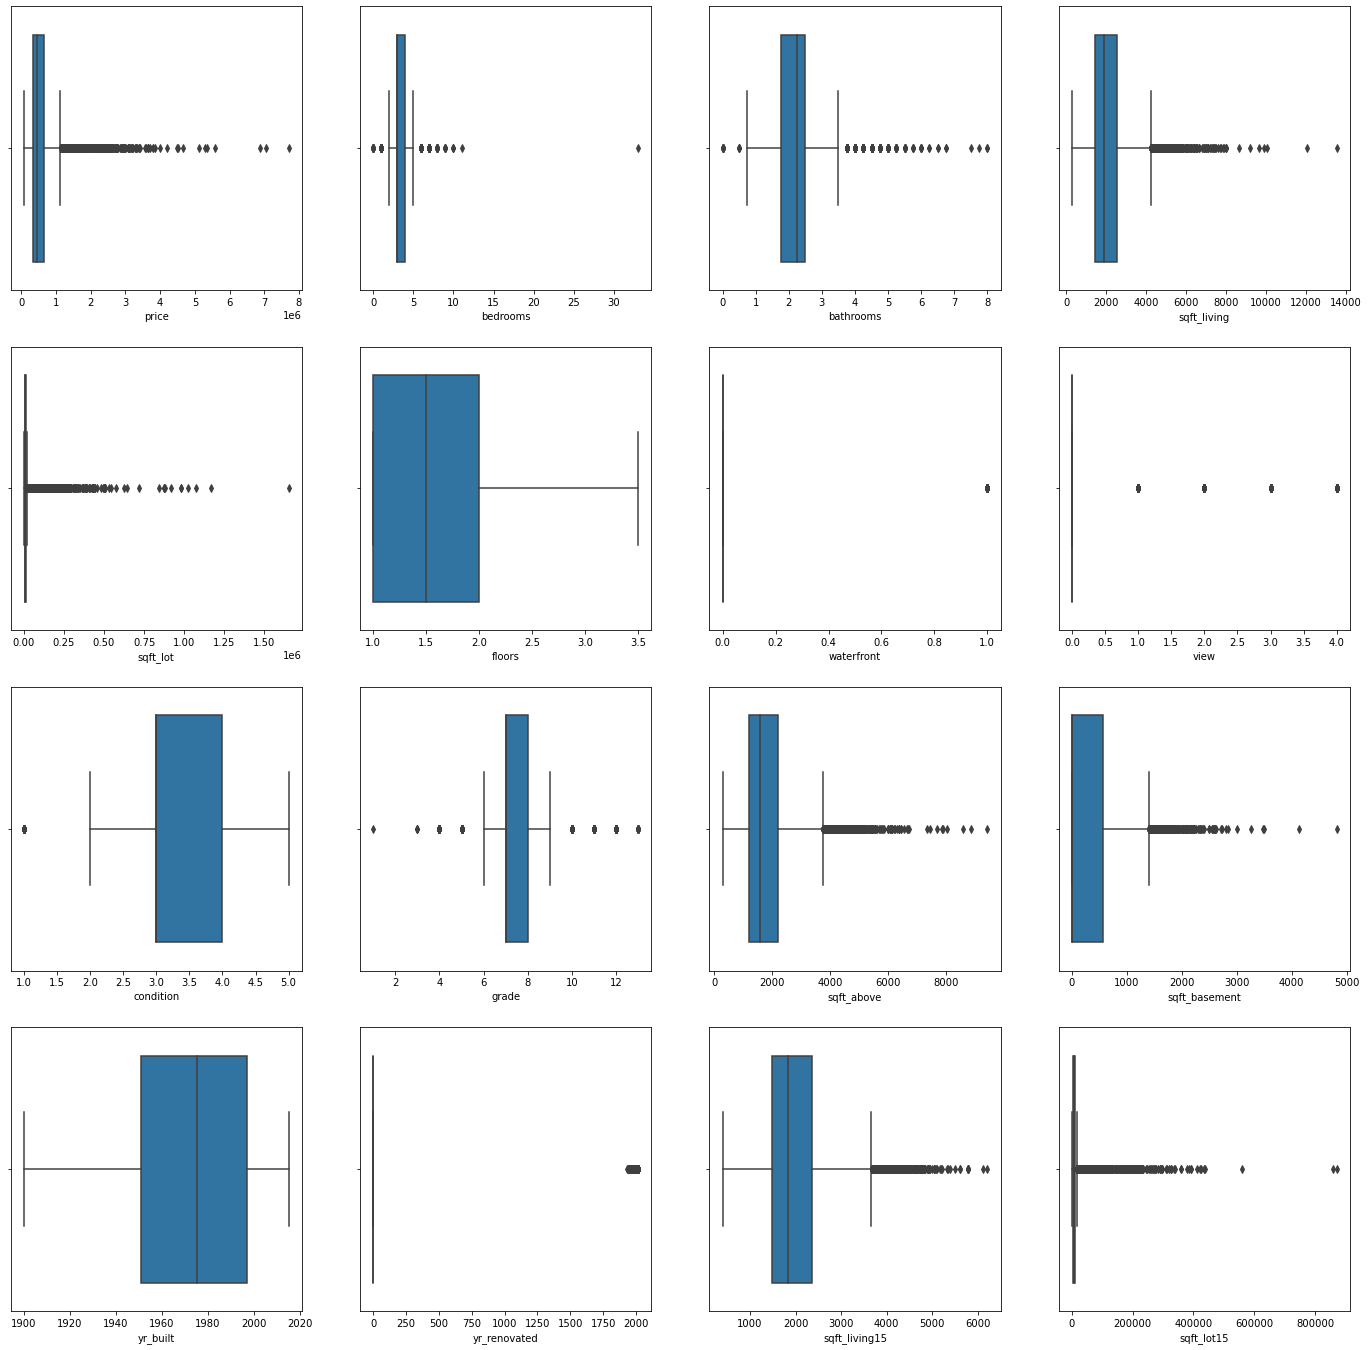

In [28]:
## Plot Boxplot For Numerical Columns to show distribution data & outliers value
df_outliers = df.drop(columns = ['id', 'date', 'lat','long', 'zipcode'])

plt.figure(figsize =(24, 24))
x = 1 

for column in df_outliers.columns:
    plt.subplot(4,4,x)
    sns.boxplot(df_outliers[column])
    x+=1
    
plt.show()

- Most House in King County are have no waterfront
- Most House in King County are have no good view
- Only 30 House in King County which condition is POOR
- Most House in King County are never renovated

--> The data consist of many outliers. Outliers will not be removed since it might have correspondence to house pricing scheme

### CHECKING ZERO BEDROOM & BATHROOM 

In [29]:
df[df['bedrooms'] < 1].count()
## Checking Number of House in King County having 0 Bedrooms

id               13
date             13
price            13
bedrooms         13
bathrooms        13
sqft_living      13
sqft_lot         13
floors           13
waterfront       13
view             13
condition        13
grade            13
sqft_above       13
sqft_basement    13
yr_built         13
yr_renovated     13
zipcode          13
lat              13
long             13
sqft_living15    13
sqft_lot15       13
dtype: int64

In [30]:
(13/21613) * 100
## Only represent 0.06% of total data --> have no sifnificance

0.0601489844075325

In [31]:
df[df['bedrooms'] < 1]
## Its impossible a house with sqft_living of 3064 has no bedrooms and no bathrooms 
## This data will be dropped

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,20140612T000000,1095000.0,0,0.00,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
3119,3918400017,20150205T000000,380000.0,0,0.00,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
3467,1453602309,20140805T000000,288000.0,0,1.50,1430,1650,3.0,0,0,3,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
4868,6896300380,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,2,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
6994,2954400190,20140624T000000,1295650.0,0,0.00,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
8477,2569500210,20141117T000000,339950.0,0,2.50,2290,8319,2.0,0,0,3,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
8484,2310060040,20140925T000000,240000.0,0,2.50,1810,5669,2.0,0,0,3,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
9773,3374500520,20150429T000000,355000.0,0,0.00,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,20141223T000000,235000.0,0,0.00,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
12653,7849202299,20150218T000000,320000.0,0,2.50,1490,7111,2.0,0,0,3,7,1490,0,1999,0,98065,47.5261,-121.826,1500,4675


In [32]:
df[df['bathrooms'] < 1].count()

id               86
date             86
price            86
bedrooms         86
bathrooms        86
sqft_living      86
sqft_lot         86
floors           86
waterfront       86
view             86
condition        86
grade            86
sqft_above       86
sqft_basement    86
yr_built         86
yr_renovated     86
zipcode          86
lat              86
long             86
sqft_living15    86
sqft_lot15       86
dtype: int64

In [33]:
(86/21613) * 100
## Percentage data having 0 bathrooms is under 1% --> Drop Data

0.39790866608059966

In [34]:
df[df['bathrooms'] == 0]
## Its impossible a house with sqft_living of 3064 has no bedrooms and no bathrooms 
## This data will be dropped

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,20140612T000000,1095000.0,0,0.0,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
1149,3421079032,20150217T000000,75000.0,1,0.0,670,43377,1.0,0,0,3,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
3119,3918400017,20150205T000000,380000.0,0,0.0,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
5832,5702500050,20141104T000000,280000.0,1,0.0,600,24501,1.0,0,0,2,3,600,0,1950,0,98045,47.5316,-121.749,990,22549
6994,2954400190,20140624T000000,1295650.0,0,0.0,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
9773,3374500520,20150429T000000,355000.0,0,0.0,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,20141223T000000,235000.0,0,0.0,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
10481,203100435,20140918T000000,484000.0,1,0.0,690,23244,1.0,0,0,4,7,690,0,1948,0,98053,47.6429,-121.955,1690,19290
14423,9543000205,20150413T000000,139950.0,0,0.0,844,4269,1.0,0,0,4,7,844,0,1913,0,98001,47.2781,-122.250,1380,9600
19452,3980300371,20140926T000000,142000.0,0,0.0,290,20875,1.0,0,0,1,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850


In [35]:
df = df[df['bathrooms'] !=0]
## Drop House with 0 bathrooms

In [36]:
df[df['bathrooms'] == 0]
## Recheck the data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [37]:
df = df[df['bedrooms'] !=0]
## Drop House with 0 bedrooms

In [38]:
df[df['bedrooms'] < 1]
## Recheck Data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


# DATA PREPARATION

### DATE AND TIME HANDLING

In [39]:
df.dtypes
## Current Date data type is still in object type

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [40]:
df['date'] = pd.to_datetime(df['date'], yearfirst=True)
## Change Date Tipe Type Data Into datetime64

In [41]:
df.dtypes
## Date & Time Data have been changed

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [42]:
purchase_date = df['date'].dt

In [43]:
df['month_sold'] = purchase_date.month
df['yr_sold'] =  purchase_date.year
## Create Month Name Column for further analysis

### FEATURES ENGINEERING FOR EDA

- Binning House Price (Based On: https://www.nar.realtor/sites/default/files/reports/2017/2017-home-buyer-and-seller-generational-trends-03-07-2017.pdf page 40)
- Binning House Sqft_living (Based On: https://www.nar.realtor/sites/default/files/reports/2017/2017-home-buyer-and-seller-generational-trends-03-07-2017.pdf page 42)
- Binning House Age (Based On: https://www.nar.realtor/sites/default/files/reports/2017/2017-home-buyer-and-seller-generational-trends-03-07-2017.pdf page 44)
- Recategorize House Grade (Based on : https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r)
    - 1-5: Low Quality Construction and Design
    - 6-10: Average Quality Consturction and Design
    - 11-13: High Quality Construction and Design
- Changing yr_renovated into renovated or not renovated

#### Binning House Price

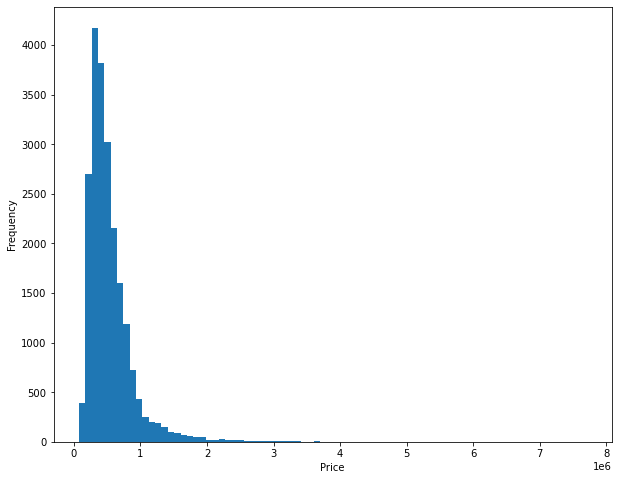

In [44]:
## Price Distribution Data
plt.figure(figsize=(10,8))
plt.hist(df['price'], bins=80, rwidth=1) ## by default 1
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In [45]:
# house_bin_price =[0, 75000, 100000, 125000, 150000, 175000, 200000, 250000, 300000, 350000, 400000, 500000, df['price'].max()]
# house_label_price = ['Less Than 75K', '75K - 99.9K', '100K - 124.9K','125K - 149.9K','150K - 174.9K', '175K - 199.9K', '200K - 249.9K', '250K - 299.9K', '300K - 349.9K', '350K - 399.9K', '400K - 499.9K', '500K or more']
# Q1 = 320000 Q2 = 450000 Q3 = 645000 

house_price_bin =[-1, 100000, 150000, 350000, 500000, 650000, 800000, 1000000, 2000000, df['price'].max()]
house_price_label = ['Less Than 100K', '100K - 149.9K', '150K - 349.9K','350K - 499.9K','500K - 649.9K', '650K - 799.9K', '800K - 999.9K', '1M - 2M', 'More Than 2M']

df['pricing_group'] = pd.cut(df['price'], bins = house_price_bin, labels = house_price_label)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,yr_sold,pricing_group
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014,150K - 349.9K
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014,500K - 649.9K
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015,150K - 349.9K
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014,500K - 649.9K
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015,500K - 649.9K


#### Binning House sqft_living

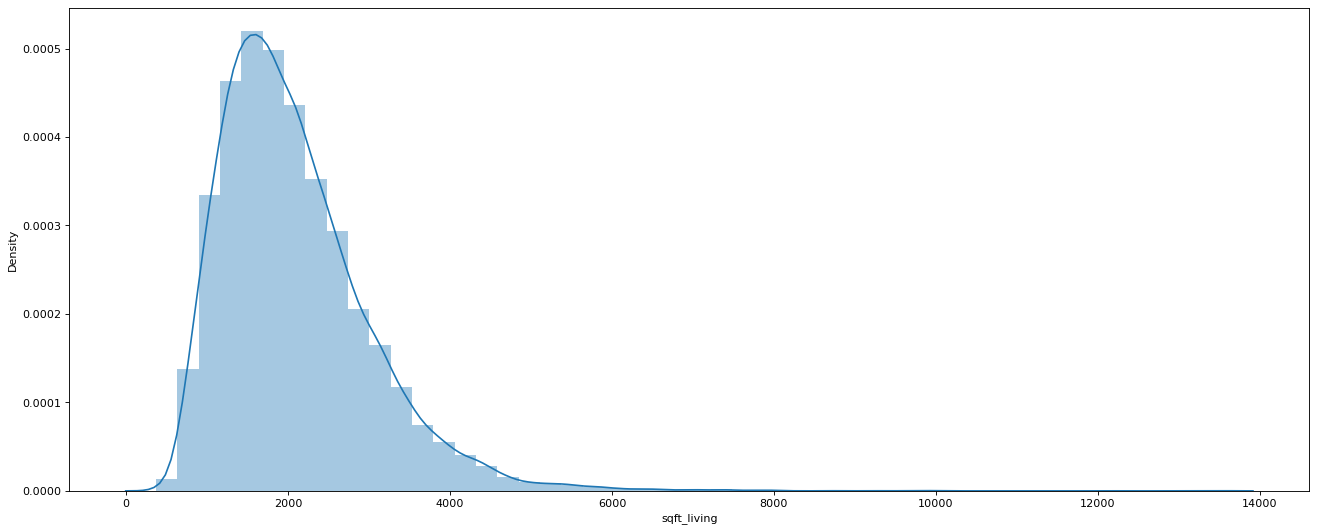

In [46]:
#### Sqft_living Distribution Data
plt.figure(figsize=(20,8), dpi = 80)
sns.distplot(df['sqft_living'])
plt.show()

In [47]:
house_sqft_living_bin =[0, 1000, 1500, 2000, 2500, 3000, 3500, df['sqft_living'].max()]
house_sqft_living_label = ['1,000 sqft or less', '1,001 to 1,500 sqft', '1,501 to 2,000 sqft','2,001 to 2,500 sqft','2,501 to 3,000 sqft', '3,001 to 3,500 sqft', '3,501 sqft or more']

df['sqft_living_group'] = pd.cut(df['sqft_living'], bins = house_sqft_living_bin, labels = house_sqft_living_label)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,yr_sold,pricing_group,sqft_living_group
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014,150K - 349.9K,"1,001 to 1,500 sqft"
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014,500K - 649.9K,"2,501 to 3,000 sqft"
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015,150K - 349.9K,"1,000 sqft or less"
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014,500K - 649.9K,"1,501 to 2,000 sqft"
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015,500K - 649.9K,"1,501 to 2,000 sqft"


#### Binning House sqft_lot

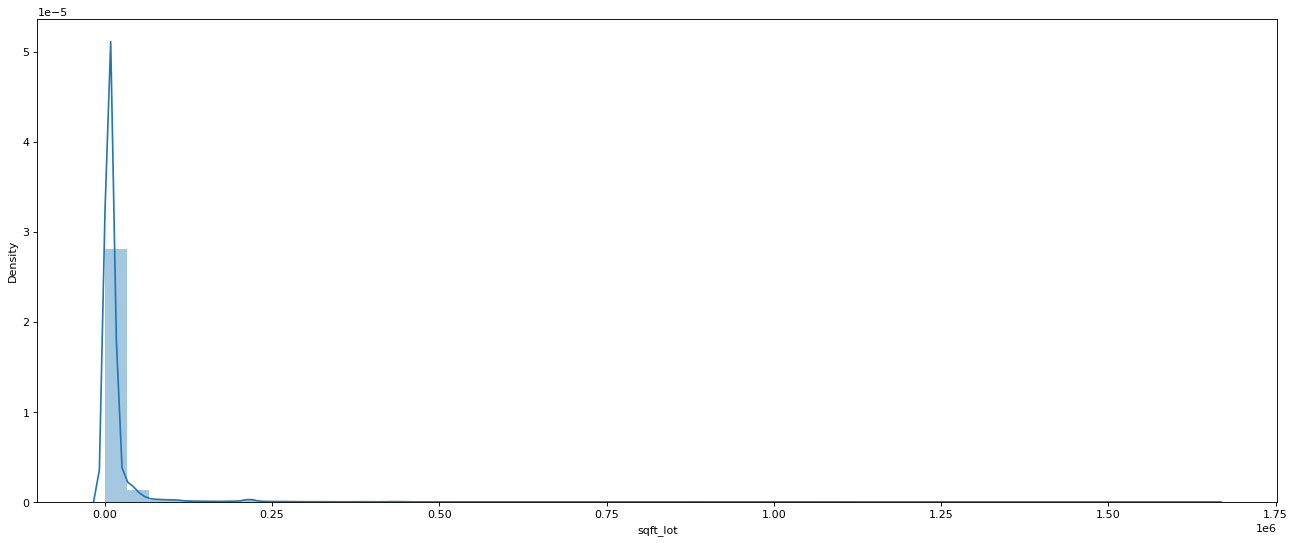

In [48]:
plt.figure(figsize=(20,8), dpi = 80)
sns.distplot(df['sqft_lot'])
plt.show()

In [49]:
house_sqft_lot_bin =[-1, 3000, 5500, 8000, 10500, 13000, df['sqft_lot'].max()]
house_sqft_lot_label = ['3,000 sqft or less', '3,001 to 5,500 sqft', '5,501 to 8,000 sqft','8,001 to 10,500 sqft','10,501 to 13,000 sqft', '13,001 or more']

df['sqft_lot_group'] = pd.cut(df['sqft_lot'], bins = house_sqft_lot_bin, labels = house_sqft_lot_label)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,yr_sold,pricing_group,sqft_living_group,sqft_lot_group
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014,150K - 349.9K,"1,001 to 1,500 sqft","5,501 to 8,000 sqft"
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014,500K - 649.9K,"2,501 to 3,000 sqft","5,501 to 8,000 sqft"
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015,150K - 349.9K,"1,000 sqft or less","8,001 to 10,500 sqft"
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014,500K - 649.9K,"1,501 to 2,000 sqft","3,001 to 5,500 sqft"
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015,500K - 649.9K,"1,501 to 2,000 sqft","8,001 to 10,500 sqft"


#### Binning House sqft_basement

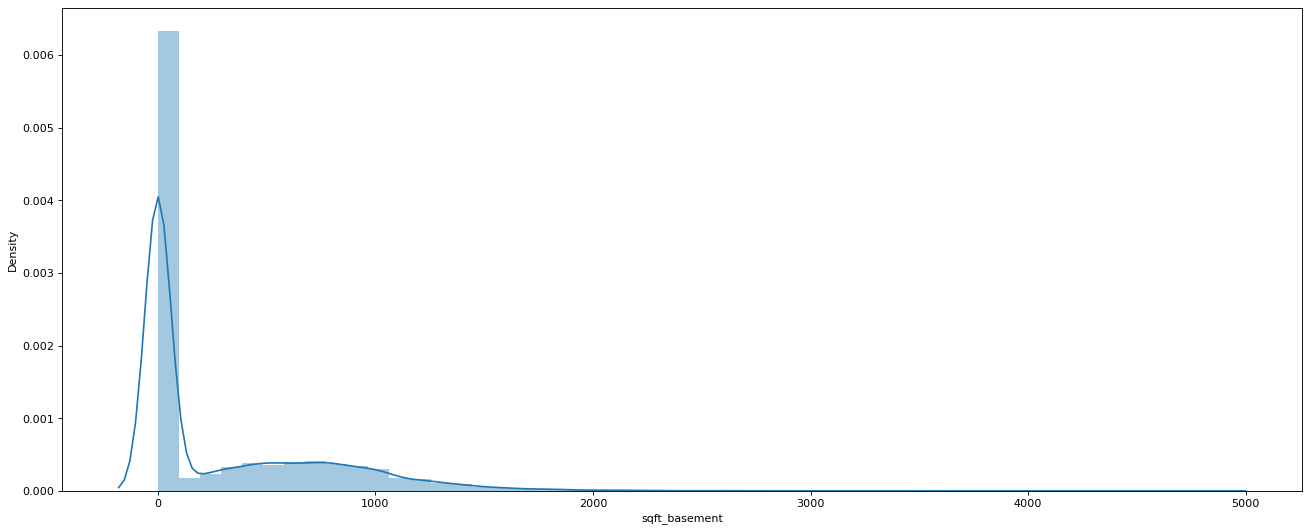

In [50]:
#### Sqft_living Distribution Data
plt.figure(figsize=(20,8), dpi = 80)
sns.distplot(df['sqft_basement'])
plt.show()

In [51]:
house_sqft_basement_bin =[-1, 300, 600, 900, 1200, 1500, df['sqft_lot'].max()]
house_sqft_basement_label = ['300 sqft or less', '301 to 600 sqft', '601 to 900 sqft','901 to 1200 sqft','1201 to 1500 sqft', '1501 or more']

df['sqft_basement_group'] = pd.cut(df['sqft_basement'], bins = house_sqft_basement_bin, labels = house_sqft_basement_label)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,yr_sold,pricing_group,sqft_living_group,sqft_lot_group,sqft_basement_group
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014,150K - 349.9K,"1,001 to 1,500 sqft","5,501 to 8,000 sqft",300 sqft or less
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014,500K - 649.9K,"2,501 to 3,000 sqft","5,501 to 8,000 sqft",301 to 600 sqft
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015,150K - 349.9K,"1,000 sqft or less","8,001 to 10,500 sqft",300 sqft or less
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014,500K - 649.9K,"1,501 to 2,000 sqft","3,001 to 5,500 sqft",901 to 1200 sqft
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015,500K - 649.9K,"1,501 to 2,000 sqft","8,001 to 10,500 sqft",300 sqft or less


#### Basement Recategorize

In [52]:
basement_recategorize = []
for i in df['sqft_basement']:
    if i == 0:
        basement_recategorize.append('Not Have Basement')
    else:
        basement_recategorize.append('Have Basement')

In [53]:
df['basement_rec'] = basement_recategorize
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,yr_sold,pricing_group,sqft_living_group,sqft_lot_group,sqft_basement_group,basement_rec
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014,150K - 349.9K,"1,001 to 1,500 sqft","5,501 to 8,000 sqft",300 sqft or less,Not Have Basement
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014,500K - 649.9K,"2,501 to 3,000 sqft","5,501 to 8,000 sqft",301 to 600 sqft,Have Basement
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015,150K - 349.9K,"1,000 sqft or less","8,001 to 10,500 sqft",300 sqft or less,Not Have Basement
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014,500K - 649.9K,"1,501 to 2,000 sqft","3,001 to 5,500 sqft",901 to 1200 sqft,Have Basement
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015,500K - 649.9K,"1,501 to 2,000 sqft","8,001 to 10,500 sqft",300 sqft or less,Not Have Basement


#### Recategorize House Grade

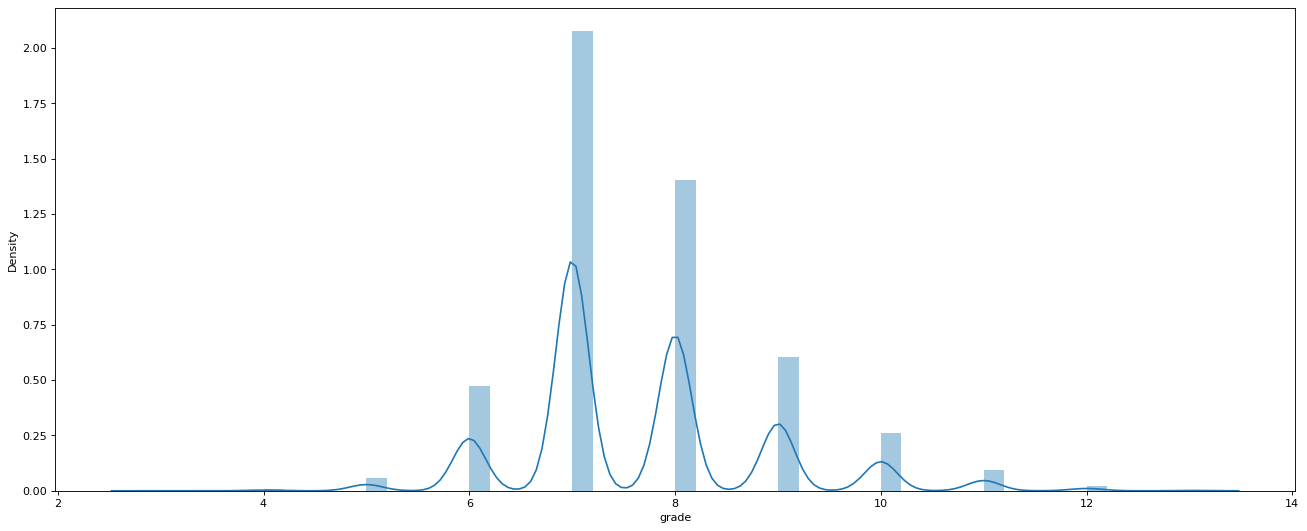

In [54]:
#### House Grade Distribution Data
plt.figure(figsize=(20,8), dpi = 80)
sns.distplot(df['grade'])
plt.show()

In [55]:
house_bin_quality =[1,5,10,13]
house_label_quality = ['Low', 'Average', 'High']

df['house_quality'] = pd.cut(df['grade'], bins = house_bin_quality, labels = house_label_quality)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,yr_sold,pricing_group,sqft_living_group,sqft_lot_group,sqft_basement_group,basement_rec,house_quality
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014,150K - 349.9K,"1,001 to 1,500 sqft","5,501 to 8,000 sqft",300 sqft or less,Not Have Basement,Average
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014,500K - 649.9K,"2,501 to 3,000 sqft","5,501 to 8,000 sqft",301 to 600 sqft,Have Basement,Average
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015,150K - 349.9K,"1,000 sqft or less","8,001 to 10,500 sqft",300 sqft or less,Not Have Basement,Average
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014,500K - 649.9K,"1,501 to 2,000 sqft","3,001 to 5,500 sqft",901 to 1200 sqft,Have Basement,Average
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015,500K - 649.9K,"1,501 to 2,000 sqft","8,001 to 10,500 sqft",300 sqft or less,Not Have Basement,Average


#### Adding Features House Age

In [56]:
## Create House Age Column for Further Analysis
df['house_age'] = df['yr_sold'] - df['yr_built']

In [57]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,yr_sold,pricing_group,sqft_living_group,sqft_lot_group,sqft_basement_group,basement_rec,house_quality,house_age
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014,150K - 349.9K,"1,001 to 1,500 sqft","5,501 to 8,000 sqft",300 sqft or less,Not Have Basement,Average,59
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014,500K - 649.9K,"2,501 to 3,000 sqft","5,501 to 8,000 sqft",301 to 600 sqft,Have Basement,Average,63
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015,150K - 349.9K,"1,000 sqft or less","8,001 to 10,500 sqft",300 sqft or less,Not Have Basement,Average,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014,500K - 649.9K,"1,501 to 2,000 sqft","3,001 to 5,500 sqft",901 to 1200 sqft,Have Basement,Average,49
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015,500K - 649.9K,"1,501 to 2,000 sqft","8,001 to 10,500 sqft",300 sqft or less,Not Have Basement,Average,28


In [58]:
df[df['house_age'] < 0]
## There are some house having age < 0 ==> new house (customers buy it before built)
## https://www.braybray.co.uk/can-i-buy-a-new-build-property-before-its-built/#:~:text=You%20absolutely%20can%20buy%20a,you%20can%20view%20in%20person.

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,yr_sold,pricing_group,sqft_living_group,sqft_lot_group,sqft_basement_group,basement_rec,house_quality,house_age
1763,1832100030,2014-06-25,597326.0,4,4.00,3570,8250,2.0,0,0,3,10,2860,710,2015,0,98040,47.5784,-122.226,2230,10000,6,2014,500K - 649.9K,"3,501 sqft or more","8,001 to 10,500 sqft",601 to 900 sqft,Have Basement,Average,-1
2687,3076500830,2014-10-29,385195.0,1,1.00,710,6000,1.5,0,0,3,6,710,0,2015,0,98144,47.5756,-122.316,1440,4800,10,2014,350K - 499.9K,"1,000 sqft or less","5,501 to 8,000 sqft",300 sqft or less,Not Have Basement,Average,-1
7526,9520900210,2014-12-31,614285.0,5,2.75,2730,6401,2.0,0,0,3,8,2730,0,2015,0,98072,47.7685,-122.160,2520,6126,12,2014,500K - 649.9K,"2,501 to 3,000 sqft","5,501 to 8,000 sqft",300 sqft or less,Not Have Basement,Average,-1
8039,1250200495,2014-06-24,455000.0,2,1.50,1200,1259,2.0,0,0,3,8,1000,200,2015,0,98144,47.6001,-122.298,1320,1852,6,2014,350K - 499.9K,"1,001 to 1,500 sqft","3,000 sqft or less",300 sqft or less,Have Basement,Average,-1
14489,2770601530,2014-08-26,500000.0,2,2.25,1570,1269,2.0,0,0,3,9,1280,290,2015,0,98199,47.6514,-122.385,1570,6000,8,2014,350K - 499.9K,"1,501 to 2,000 sqft","3,000 sqft or less",300 sqft or less,Have Basement,Average,-1
17098,9126100346,2014-06-17,350000.0,3,2.00,1380,3600,3.0,0,0,3,8,1380,0,2015,0,98122,47.6074,-122.305,1480,3600,6,2014,150K - 349.9K,"1,001 to 1,500 sqft","3,001 to 5,500 sqft",300 sqft or less,Not Have Basement,Average,-1
19805,9126100765,2014-08-01,455000.0,3,1.75,1320,1014,3.0,0,0,3,9,1320,0,2015,0,98122,47.6047,-122.305,1380,1495,8,2014,350K - 499.9K,"1,001 to 1,500 sqft","3,000 sqft or less",300 sqft or less,Not Have Basement,Average,-1
20770,9310300160,2014-08-28,357000.0,5,2.50,2990,9240,2.0,0,0,3,8,2990,0,2015,0,98133,47.7384,-122.348,1970,18110,8,2014,350K - 499.9K,"2,501 to 3,000 sqft","8,001 to 10,500 sqft",300 sqft or less,Not Have Basement,Average,-1
20852,1257201420,2014-07-09,595000.0,4,3.25,3730,4560,2.0,0,0,3,9,2760,970,2015,0,98103,47.6725,-122.330,1800,4560,7,2014,500K - 649.9K,"3,501 sqft or more","3,001 to 5,500 sqft",901 to 1200 sqft,Have Basement,Average,-1
20963,6058600220,2014-07-31,230000.0,3,1.50,1040,1264,2.0,0,0,3,9,900,140,2015,0,98144,47.5951,-122.301,1350,3000,7,2014,150K - 349.9K,"1,001 to 1,500 sqft","3,000 sqft or less",300 sqft or less,Have Basement,Average,-1


#### Recategorize House Age

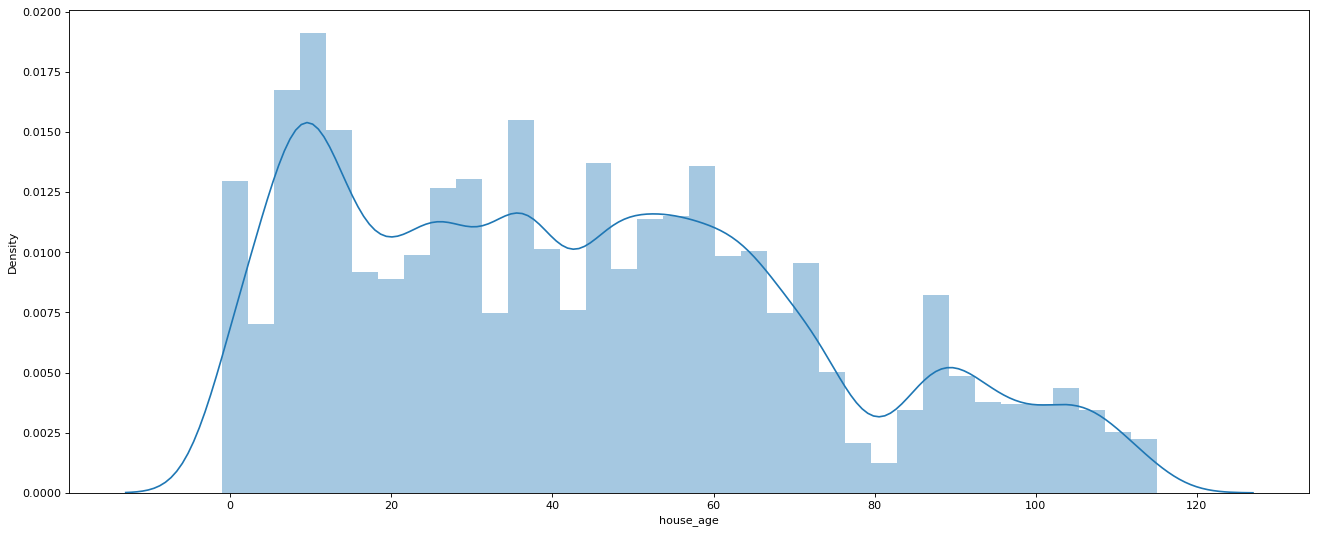

In [59]:
#### Price Distribution Data
plt.figure(figsize=(20,8), dpi = 80)
sns.distplot(df['house_age'])
plt.show()

In [60]:
house_age_bin = [df['house_age'].min(), 1, 6, 11, 26, 51, 76, 101, df['house_age'].max()]
house_age_label = ['<1', '1-5', '6-10', '11-25','26-50','51-75', '76-100', '>100']

df['house_age_group'] = pd.cut(df['house_age'], bins = house_age_bin, labels = house_age_label)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,yr_sold,pricing_group,sqft_living_group,sqft_lot_group,sqft_basement_group,basement_rec,house_quality,house_age,house_age_group
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014,150K - 349.9K,"1,001 to 1,500 sqft","5,501 to 8,000 sqft",300 sqft or less,Not Have Basement,Average,59,51-75
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014,500K - 649.9K,"2,501 to 3,000 sqft","5,501 to 8,000 sqft",301 to 600 sqft,Have Basement,Average,63,51-75
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015,150K - 349.9K,"1,000 sqft or less","8,001 to 10,500 sqft",300 sqft or less,Not Have Basement,Average,82,76-100
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014,500K - 649.9K,"1,501 to 2,000 sqft","3,001 to 5,500 sqft",901 to 1200 sqft,Have Basement,Average,49,26-50
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015,500K - 649.9K,"1,501 to 2,000 sqft","8,001 to 10,500 sqft",300 sqft or less,Not Have Basement,Average,28,26-50


#### Renovated Recategorize

In [61]:
renovated_recategorize = []
for i in df['yr_renovated']:
    if i == 0:
        renovated_recategorize.append('Not Renovated')
    else:
        renovated_recategorize.append('Renovated')

In [62]:
df['renovated_rec'] = renovated_recategorize
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,yr_sold,pricing_group,sqft_living_group,sqft_lot_group,sqft_basement_group,basement_rec,house_quality,house_age,house_age_group,renovated_rec
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014,150K - 349.9K,"1,001 to 1,500 sqft","5,501 to 8,000 sqft",300 sqft or less,Not Have Basement,Average,59,51-75,Not Renovated
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014,500K - 649.9K,"2,501 to 3,000 sqft","5,501 to 8,000 sqft",301 to 600 sqft,Have Basement,Average,63,51-75,Renovated
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015,150K - 349.9K,"1,000 sqft or less","8,001 to 10,500 sqft",300 sqft or less,Not Have Basement,Average,82,76-100,Not Renovated
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014,500K - 649.9K,"1,501 to 2,000 sqft","3,001 to 5,500 sqft",901 to 1200 sqft,Have Basement,Average,49,26-50,Not Renovated
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015,500K - 649.9K,"1,501 to 2,000 sqft","8,001 to 10,500 sqft",300 sqft or less,Not Have Basement,Average,28,26-50,Not Renovated


# EXPLORATORY DATA ANALYSIS & DATA VISUALIZATION

##### Initial Hypothesis 
- Number of bedrooms affect price of house 
- Number of bathrooms affect price of house
- Sqft_living affect price of house
- sqft_lot affect price of house
- floors don't affect price of house
- Waterfront affect price of house
- View affect price of house
- Grade affect price of house
- Location affect price of house
- House age affect price of house
- Renovated or renovated affect price of house
- grade has same effect with condition
- sqft_above, sqft_living_15 has same effect with sqft_living
- sqft_lot has same effect with sqft_lot_15

### CORELLATION ANALYSIS

In [63]:
df_corr = df.drop(columns=['id', 'date'])

In [64]:
round(df_corr.corr(),2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,yr_sold,house_age
price,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.40,0.04,0.67,0.61,0.32,0.05,0.13,-0.05,0.31,0.02,0.59,0.08,-0.01,0.00,-0.05
bedrooms,0.31,1.00,0.51,0.58,0.03,0.18,-0.01,0.08,0.03,0.36,0.48,0.30,0.16,0.02,-0.15,-0.01,0.13,0.39,0.03,-0.00,-0.01,-0.16
bathrooms,0.53,0.51,1.00,0.76,0.09,0.50,0.06,0.19,-0.13,0.67,0.69,0.28,0.51,0.05,-0.20,0.02,0.22,0.57,0.09,0.01,-0.03,-0.51
sqft_living,0.70,0.58,0.76,1.00,0.17,0.35,0.10,0.28,-0.06,0.76,0.88,0.44,0.32,0.06,-0.20,0.05,0.24,0.76,0.18,0.01,-0.03,-0.32
sqft_lot,0.09,0.03,0.09,0.17,1.00,-0.00,0.02,0.07,-0.01,0.11,0.18,0.02,0.05,0.01,-0.13,-0.09,0.23,0.14,0.72,-0.00,0.01,-0.05
floors,0.26,0.18,0.50,0.35,-0.00,1.00,0.02,0.03,-0.26,0.46,0.52,-0.25,0.49,0.01,-0.06,0.05,0.13,0.28,-0.01,0.01,-0.02,-0.49
waterfront,0.27,-0.01,0.06,0.10,0.02,0.02,1.00,0.40,0.02,0.08,0.07,0.08,-0.03,0.09,0.03,-0.01,-0.04,0.09,0.03,0.01,-0.00,0.03
view,0.40,0.08,0.19,0.28,0.07,0.03,0.40,1.00,0.05,0.25,0.17,0.28,-0.05,0.10,0.08,0.01,-0.08,0.28,0.07,-0.01,0.00,0.05
condition,0.04,0.03,-0.13,-0.06,-0.01,-0.26,0.02,0.05,1.00,-0.15,-0.16,0.17,-0.36,-0.06,0.00,-0.02,-0.11,-0.09,-0.00,0.02,-0.05,0.36
grade,0.67,0.36,0.67,0.76,0.11,0.46,0.08,0.25,-0.15,1.00,0.76,0.17,0.45,0.01,-0.19,0.11,0.20,0.71,0.12,0.01,-0.03,-0.45


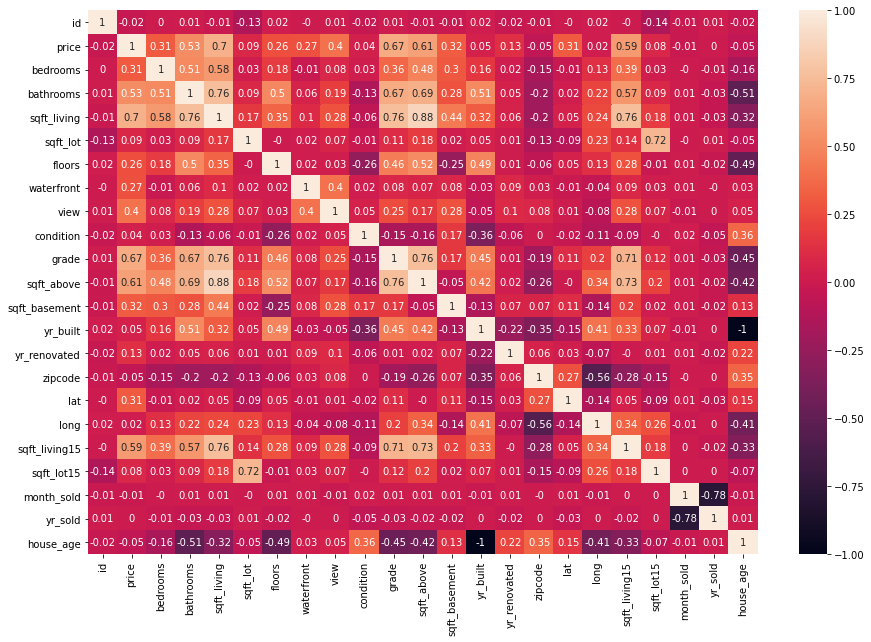

In [65]:
plt.figure(figsize=(15,10))
sns.heatmap(round(df.corr(),2), annot=True)
plt.show()

In [66]:
## To ensure corelation, further analysis will be conducted

### UNIVARIATE ANALYSIS

#### Price

In [67]:
df['pricing_group'].value_counts()

150K - 349.9K     6591
350K - 499.9K     5760
500K - 649.9K     3846
650K - 799.9K     2262
800K - 999.9K     1480
1M - 2M           1265
More Than 2M       198
100K - 149.9K      165
Less Than 100K      30
Name: pricing_group, dtype: int64

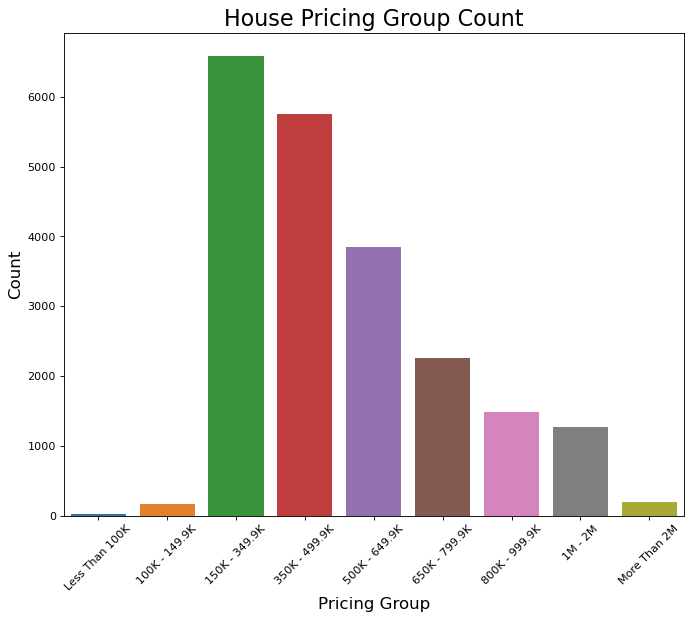

In [68]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['pricing_group'])
plt.title('House Pricing Group Count', size =20)
plt.xlabel("Pricing Group",size = 15)
plt.ylabel("Count", size = 15)
plt.xticks(rotation=45)
plt.show()

Majority Houses in King County, Washington mostly are sold in range 150,000 - 349,000

In [69]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,yr_sold,pricing_group,sqft_living_group,sqft_lot_group,sqft_basement_group,basement_rec,house_quality,house_age,house_age_group,renovated_rec
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014,150K - 349.9K,"1,001 to 1,500 sqft","5,501 to 8,000 sqft",300 sqft or less,Not Have Basement,Average,59,51-75,Not Renovated
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014,500K - 649.9K,"2,501 to 3,000 sqft","5,501 to 8,000 sqft",301 to 600 sqft,Have Basement,Average,63,51-75,Renovated
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015,150K - 349.9K,"1,000 sqft or less","8,001 to 10,500 sqft",300 sqft or less,Not Have Basement,Average,82,76-100,Not Renovated
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014,500K - 649.9K,"1,501 to 2,000 sqft","3,001 to 5,500 sqft",901 to 1200 sqft,Have Basement,Average,49,26-50,Not Renovated
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015,500K - 649.9K,"1,501 to 2,000 sqft","8,001 to 10,500 sqft",300 sqft or less,Not Have Basement,Average,28,26-50,Not Renovated


#### Bedrooms

In [70]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

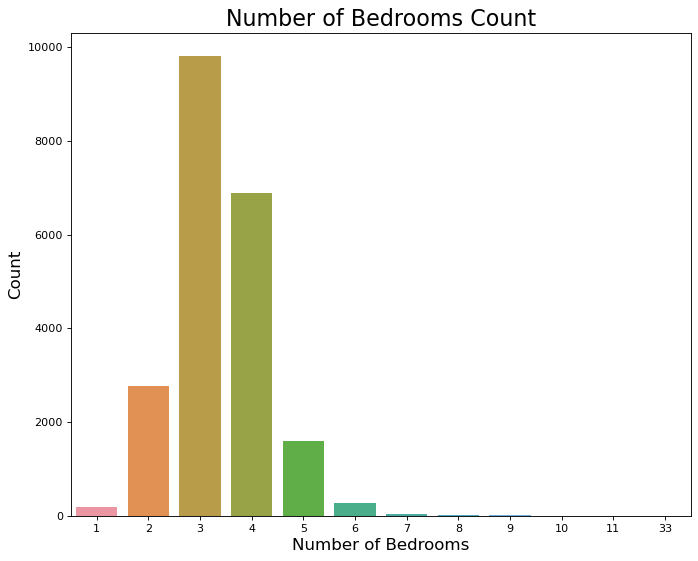

In [71]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['bedrooms'])
plt.title('Number of Bedrooms Count', size =20)
plt.xlabel("Number of Bedrooms",size = 15)
plt.ylabel("Count", size = 15)
plt.show()

- Majority Houses in King County, Washington have 3 Bedrooms
- Is it possible in one house have 33 Bedrooms? 

In [72]:
df[df['bedrooms'] == 33]
## The data is kinda weird since the house only has 1620 sqft living (150m2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,yr_sold,pricing_group,sqft_living_group,sqft_lot_group,sqft_basement_group,basement_rec,house_quality,house_age,house_age_group,renovated_rec
15870,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,6,2014,500K - 649.9K,"1,501 to 2,000 sqft","5,501 to 8,000 sqft",301 to 600 sqft,Have Basement,Average,67,51-75,Not Renovated


#### Bathrooms

In [73]:
df['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

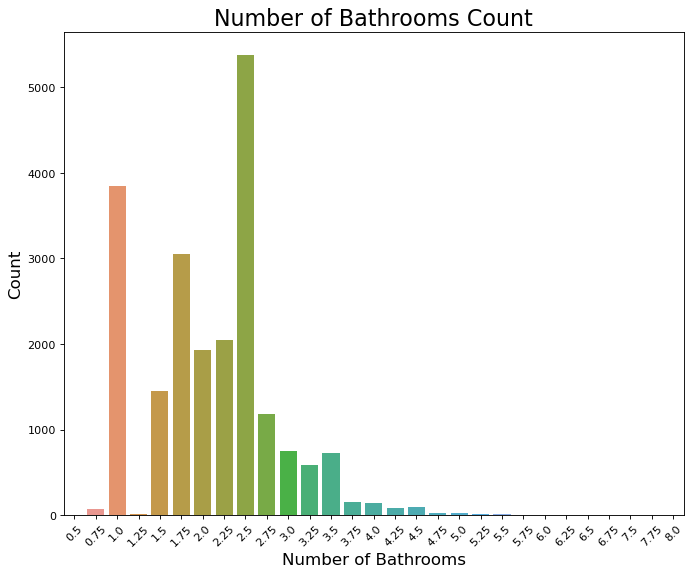

In [74]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['bathrooms'])
plt.title('Number of Bathrooms Count', size =20)
plt.xlabel("Number of Bathrooms",size = 15)
plt.ylabel("Count", size = 15)
plt.xticks(rotation=45)
plt.show()

- Majority Houses in King County, Washington have 2.5 Bathrooms

#### SQFT Living Group

In [75]:
df['sqft_living_group'].value_counts()

1,501 to 2,000 sqft    5381
1,001 to 1,500 sqft    4832
2,001 to 2,500 sqft    4202
2,501 to 3,000 sqft    2615
3,001 to 3,500 sqft    1547
3,501 sqft or more     1533
1,000 sqft or less     1487
Name: sqft_living_group, dtype: int64

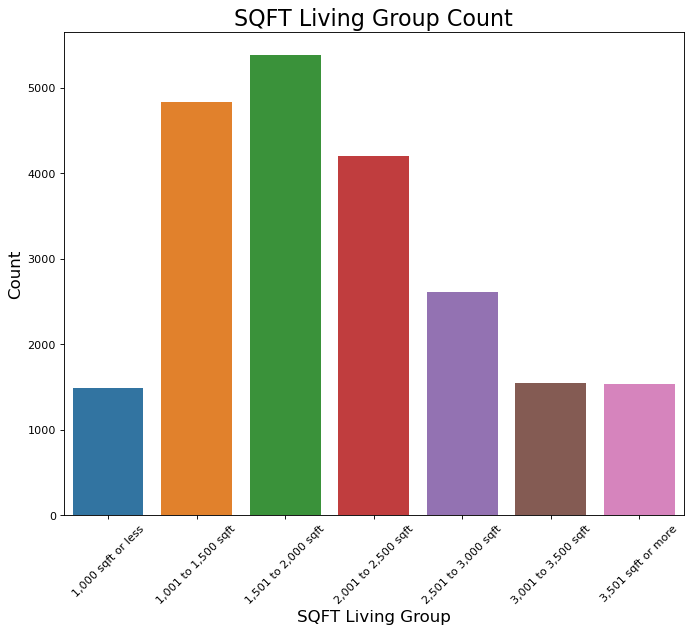

In [76]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['sqft_living_group'])
plt.title('SQFT Living Group Count', size =20)
plt.xlabel("SQFT Living Group",size = 15)
plt.ylabel("Count", size = 15)
plt.xticks(rotation=45)
plt.show()

- Majority Houses in King County, Washington have 1501 - 2000 sqft of Living Area

#### SQFT Lot Group

In [77]:
df['sqft_lot_group'].value_counts()

5,501 to 8,000 sqft      5422
3,001 to 5,500 sqft      4441
8,001 to 10,500 sqft     4314
13,001 or more           3901
3,000 sqft or less       1884
10,501 to 13,000 sqft    1635
Name: sqft_lot_group, dtype: int64

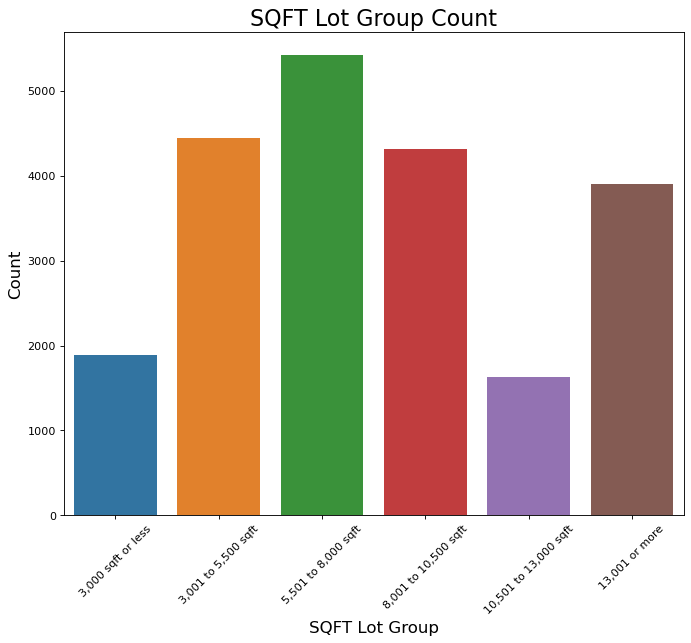

In [78]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['sqft_lot_group'])
plt.title('SQFT Lot Group Count', size =20)
plt.xlabel("SQFT Lot Group",size = 15)
plt.ylabel("Count", size = 15)
plt.xticks(rotation=45)
plt.show()

- Majority Houses in King County, Washington have 5501 - 8000 sqft of Lot Area

#### Floors

In [79]:
df['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

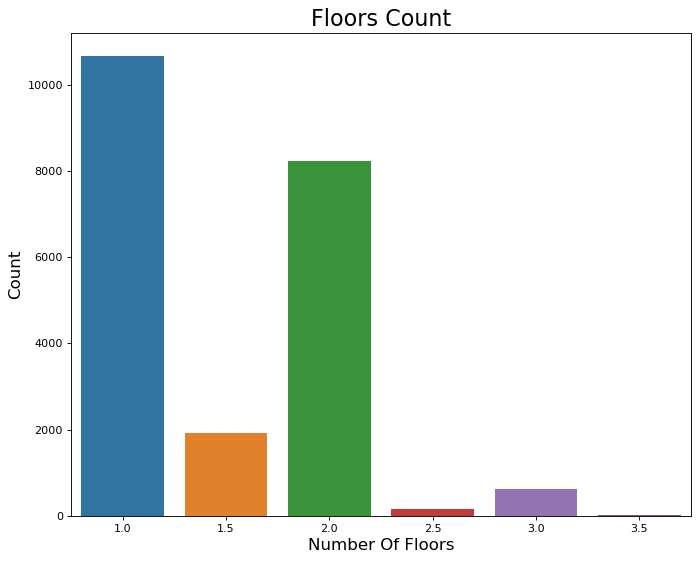

In [80]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['floors'])
plt.title('Floors Count', size =20)
plt.xlabel("Number Of Floors",size = 15)
plt.ylabel("Count", size = 15)
plt.show()

- Majority Houses in King County, Washington have 1 floors

#### Water Front

In [81]:
df['waterfront'].value_counts()

0    21434
1      163
Name: waterfront, dtype: int64

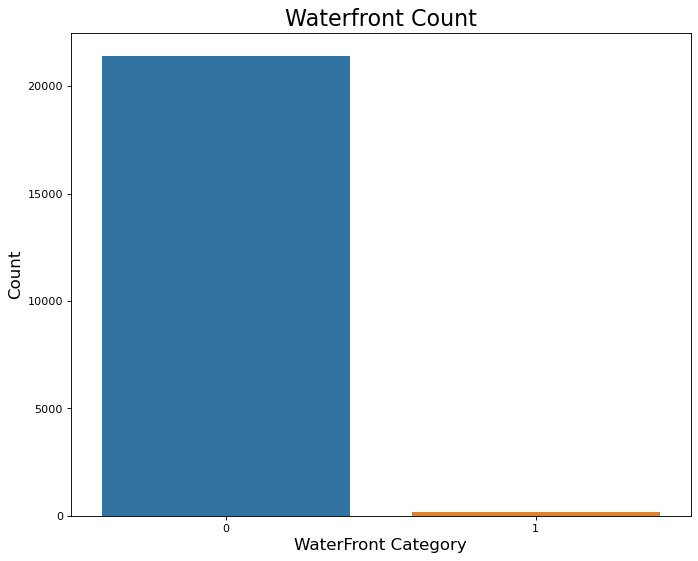

In [82]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['waterfront'])
plt.title('Waterfront Count', size =20)
plt.xlabel("WaterFront Category",size = 15)
plt.ylabel("Count", size = 15)
plt.show()

- Majority Houses in King County, Washington don't have waterfront

#### View

In [83]:
df['view'].value_counts()

0    19475
2      961
3      510
1      332
4      319
Name: view, dtype: int64

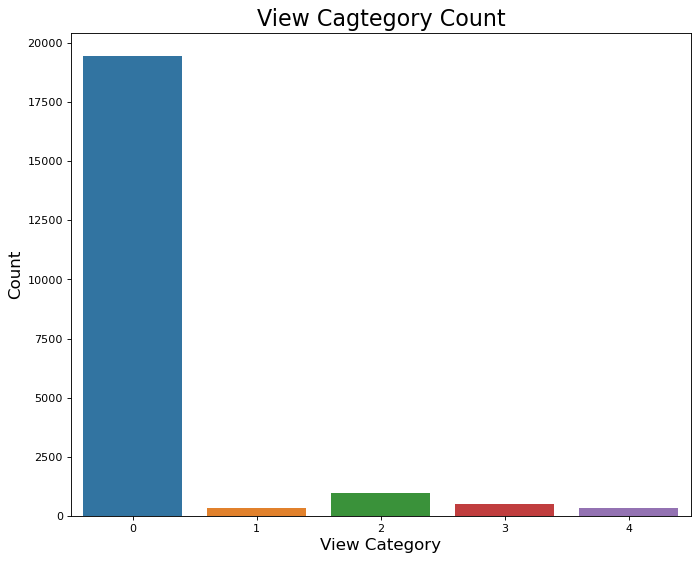

In [84]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['view'])
plt.title('View Cagtegory Count', size =20)
plt.xlabel("View Category",size = 15)
plt.ylabel("Count", size = 15)
plt.show()

- Majority Houses in King County, Washington don't have a good view

#### Grade

In [85]:
df['house_quality'].value_counts()

Average    20826
High         501
Low          270
Name: house_quality, dtype: int64

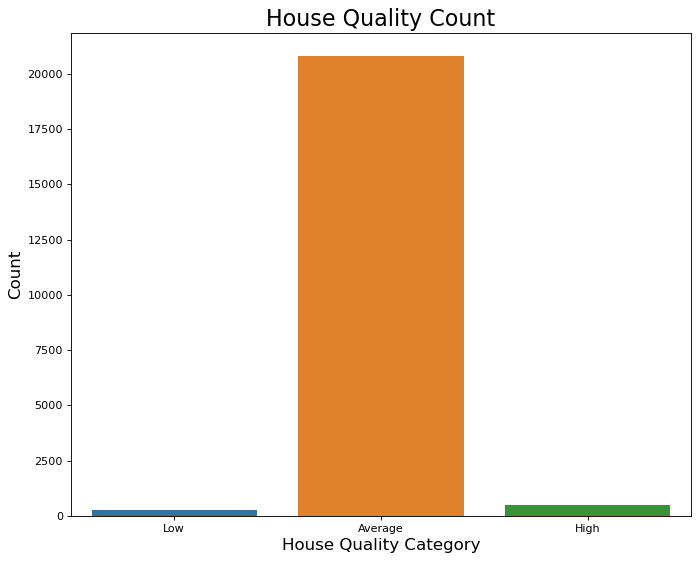

In [86]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['house_quality'])
plt.title('House Quality Count', size =20)
plt.xlabel("House Quality Category",size = 15)
plt.ylabel("Count", size = 15)
plt.show()

- Majority Houses in King County, Washington are in average quality

#### Basement

In [87]:
df['basement_rec'].value_counts()

Not Have Basement    13110
Have Basement         8487
Name: basement_rec, dtype: int64

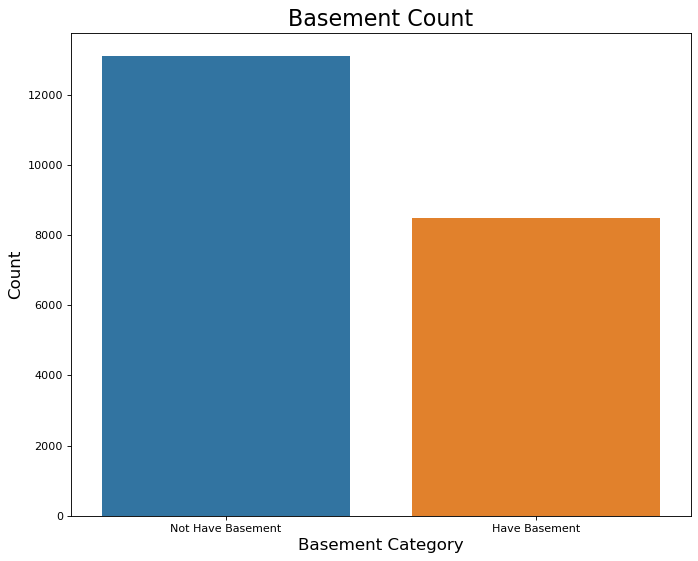

In [88]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['basement_rec'])
plt.title('Basement Count', size =20)
plt.xlabel("Basement Category",size = 15)
plt.ylabel("Count", size = 15)
plt.show()

In [89]:
df['sqft_basement_group'].value_counts()

300 sqft or less     14266
601 to 900 sqft       2416
301 to 600 sqft       2357
901 to 1200 sqft      1559
1201 to 1500 sqft      645
1501 or more           354
Name: sqft_basement_group, dtype: int64

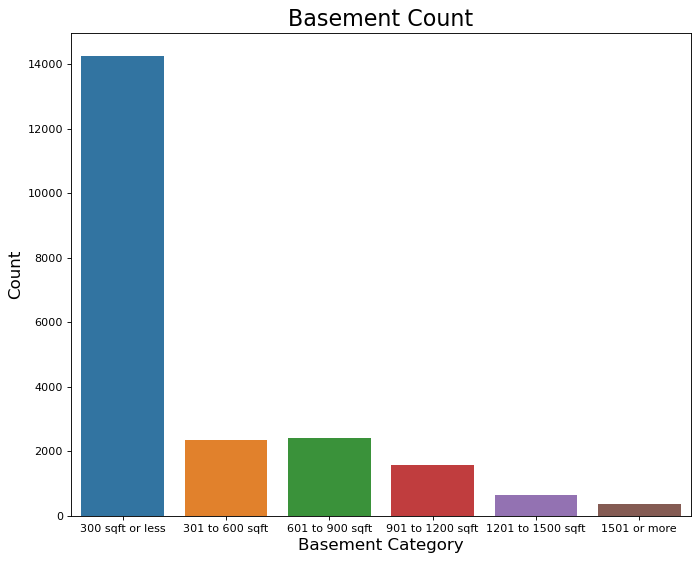

In [90]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['sqft_basement_group'])
plt.title('Basement Count', size =20)
plt.xlabel("Basement Category",size = 15)
plt.ylabel("Count", size = 15)
plt.show()

- Majority Houses in King County, Washington don't have basement 
- If houses have basement, mostly in 300 sqft or less area

#### Age

In [91]:
df['house_age_group'].value_counts()

26-50     5871
51-75     5238
11-25     3571
6-10      2174
76-100    2082
1-5        985
>100       949
<1         715
Name: house_age_group, dtype: int64

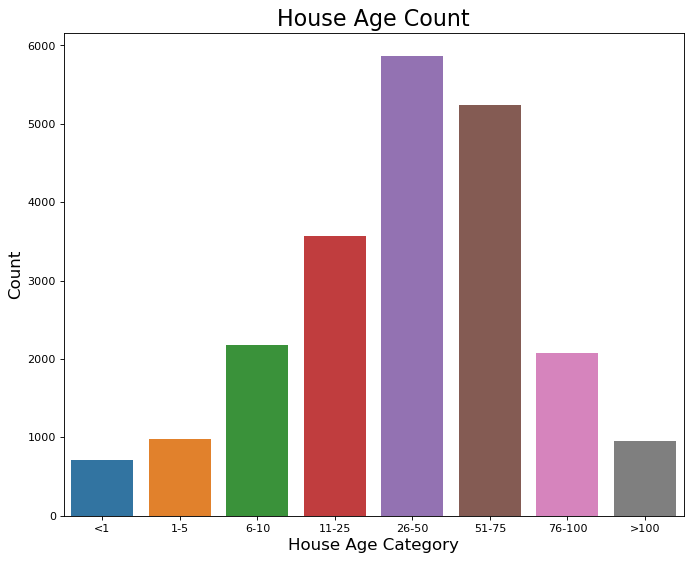

In [92]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['house_age_group'])
plt.title('House Age Count', size =20)
plt.xlabel("House Age Category",size = 15)
plt.ylabel("Count", size = 15)
plt.show()

- Majority Houses in King County, Washington are 26-50 years old

#### Renovated 

In [93]:
df['renovated_rec'].value_counts()

Not Renovated    20683
Renovated          914
Name: renovated_rec, dtype: int64

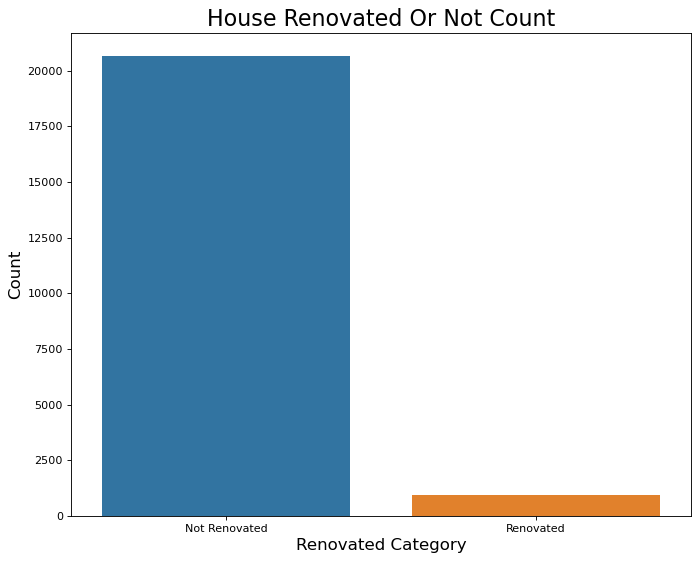

In [94]:
plt.figure(figsize=(10,8), dpi = 80)
sns.countplot(df['renovated_rec'])
plt.title('House Renovated Or Not Count', size =20)
plt.xlabel("Renovated Category",size = 15)
plt.ylabel("Count", size = 15)
plt.show()

- Majority Houses in King County, Washington have never been renovated

#### Zipcode

In [95]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

- Majority House in King County, Washington are in 98103 zipcode area

### MULTIVARIATE ANALYSIS

#### Bedrooms VS Price

In [96]:
df_pricebedrooms = df.pivot_table(index='bedrooms', values='price', aggfunc='mean').sort_values('price', ascending=False).reset_index()
df_pricebedrooms

,bedrooms,price
0,8,1.105077e+06
1,7,9.511847e+05
2,9,8.939998e+05
3,6,8.255206e+05
4,10,8.193333e+05
5,5,7.865998e+05
6,33,6.400000e+05
7,4,6.354195e+05
8,11,5.200000e+05
9,3,4.662321e+05


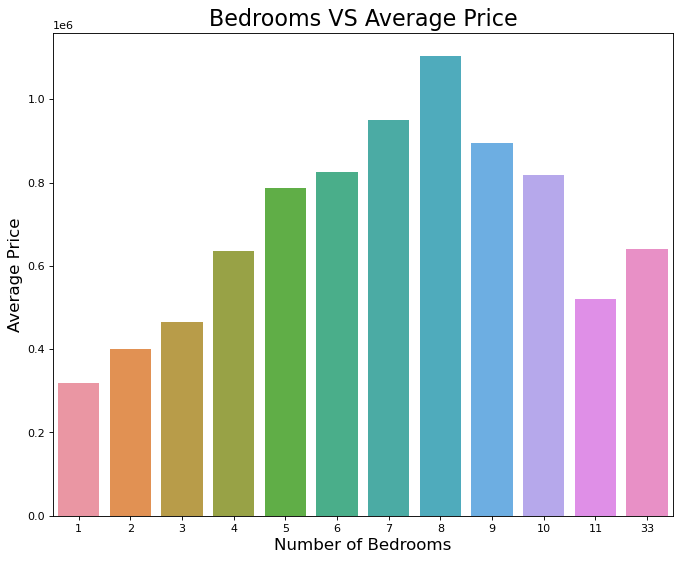

In [97]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'bedrooms' , y = 'price', data = df_pricebedrooms, estimator=sum)
plt.title('Bedrooms VS Average Price', size =20)
plt.xlabel("Number of Bedrooms",size = 15)
plt.ylabel("Average Price", size = 15)
plt.show()

- Number of bedrooms have positive impact to a House price in King County, Washington

#### Bathrooms VS Average Price

In [98]:
df_pricebathrooms = df.pivot_table(index='bathrooms', values='price', aggfunc='mean').sort_values('price', ascending=False).reset_index()
df_pricebathrooms

,bathrooms,price
0,7.75,6.885000e+06
1,8.00,4.990000e+06
2,6.25,3.094000e+06
3,6.00,2.946833e+06
4,6.75,2.734000e+06
5,5.50,2.522300e+06
6,5.75,2.492500e+06
7,4.75,2.021304e+06
8,5.25,1.817177e+06
9,6.50,1.709445e+06


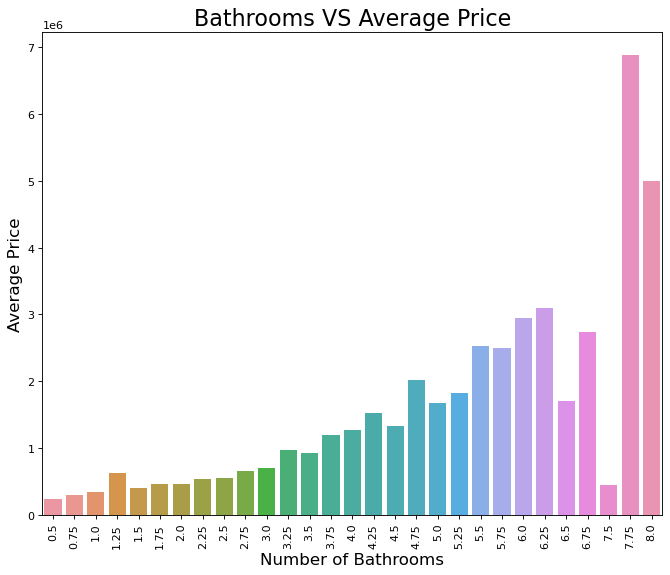

In [99]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'bathrooms' , y = 'price', data = df_pricebathrooms, estimator=sum)
plt.title('Bathrooms VS Average Price', size =20)
plt.xlabel("Number of Bathrooms",size = 15)
plt.ylabel("Average Price", size = 15)
plt.xticks(rotation=90)
plt.show()

- Number of bathrooms have positive impact to a House price in King County, Washington

#### Sqft_living_group VS Average Price

In [100]:
df_sqftliving = df.pivot_table(index='sqft_living_group', values='price', aggfunc='mean').sort_values('price', ascending=False).reset_index()
df_sqftliving

,sqft_living_group,price
0,"3,501 sqft or more",1.266936e+06
1,"3,001 to 3,500 sqft",8.127778e+05
2,"2,501 to 3,000 sqft",6.567265e+05
3,"2,001 to 2,500 sqft",5.312442e+05
4,"1,501 to 2,000 sqft",4.325801e+05
5,"1,001 to 1,500 sqft",3.612981e+05
6,"1,000 sqft or less",2.986199e+05


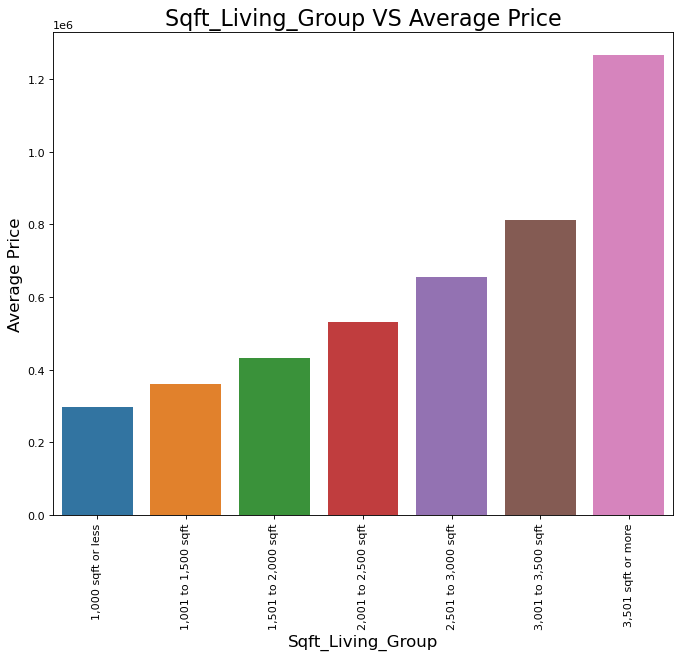

In [101]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'sqft_living_group' , y = 'price', data = df_sqftliving, estimator=sum)
plt.title('Sqft_Living_Group VS Average Price', size =20)
plt.xlabel("Sqft_Living_Group",size = 15)
plt.ylabel("Average Price", size = 15)
plt.xticks(rotation=90)
plt.show()

- Sqft_living have positive impact to a House price in King County, Washington

#### Sqft_lot_group VS Average Price

In [102]:
df_sqftlot = df.pivot_table(index='sqft_lot_group', values='price', aggfunc='mean').sort_values('price', ascending=False).reset_index()
df_sqftlot

,sqft_lot_group,price
0,"13,001 or more",709457.113561
1,"10,501 to 13,000 sqft",577170.083180
2,"3,001 to 5,500 sqft",540648.830218
3,"8,001 to 10,500 sqft",487156.396616
4,"5,501 to 8,000 sqft",475989.018259
5,"3,000 sqft or less",462882.465499


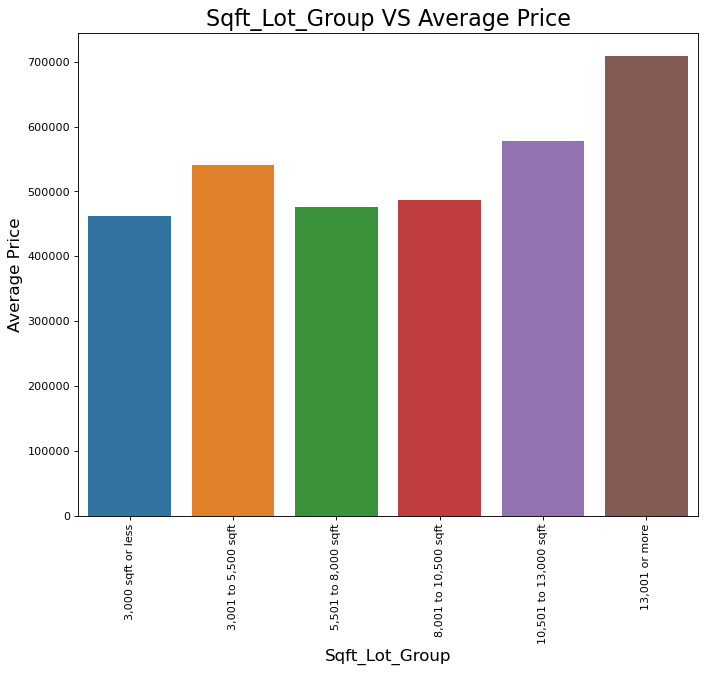

In [103]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'sqft_lot_group' , y = 'price', data = df_sqftlot, estimator=sum)
plt.title('Sqft_Lot_Group VS Average Price', size =20)
plt.xlabel("Sqft_Lot_Group",size = 15)
plt.ylabel("Average Price", size = 15)
plt.xticks(rotation=90)
plt.show()

- Sqft_lot don't have impact to a House price in King County, Washington

In [104]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,yr_sold,pricing_group,sqft_living_group,sqft_lot_group,sqft_basement_group,basement_rec,house_quality,house_age,house_age_group,renovated_rec
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014,150K - 349.9K,"1,001 to 1,500 sqft","5,501 to 8,000 sqft",300 sqft or less,Not Have Basement,Average,59,51-75,Not Renovated
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014,500K - 649.9K,"2,501 to 3,000 sqft","5,501 to 8,000 sqft",301 to 600 sqft,Have Basement,Average,63,51-75,Renovated
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015,150K - 349.9K,"1,000 sqft or less","8,001 to 10,500 sqft",300 sqft or less,Not Have Basement,Average,82,76-100,Not Renovated
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014,500K - 649.9K,"1,501 to 2,000 sqft","3,001 to 5,500 sqft",901 to 1200 sqft,Have Basement,Average,49,26-50,Not Renovated
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015,500K - 649.9K,"1,501 to 2,000 sqft","8,001 to 10,500 sqft",300 sqft or less,Not Have Basement,Average,28,26-50,Not Renovated


#### Number of Floors VS Average Price

In [105]:
df_floors = df.pivot_table(index='floors', values='price', aggfunc='mean').sort_values('price', ascending=False).reset_index()
df_floors

,floors,price
0,2.5,1.060346e+06
1,3.5,9.102143e+05
2,2.0,6.490257e+05
3,3.0,5.833395e+05
4,1.5,5.589806e+05
5,1.0,4.423194e+05


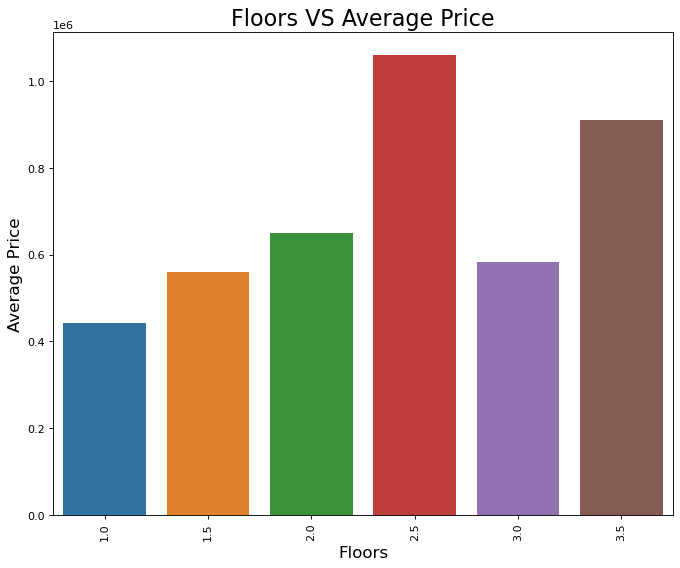

In [106]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'floors' , y = 'price', data = df_floors, estimator=sum)
plt.title('Floors VS Average Price', size =20)
plt.xlabel("Floors",size = 15)
plt.ylabel("Average Price", size = 15)
plt.xticks(rotation=90)
plt.show()

- Number of floors don't have impact to a House price in King County, Washington

#### Waterfront vs Average Price

In [107]:
df_waterfront = df.pivot_table(index='waterfront', values='price', aggfunc='mean').sort_values('price', ascending=False).reset_index()
df_waterfront

,waterfront,price
0,1,1.661876e+06
1,0,5.316729e+05


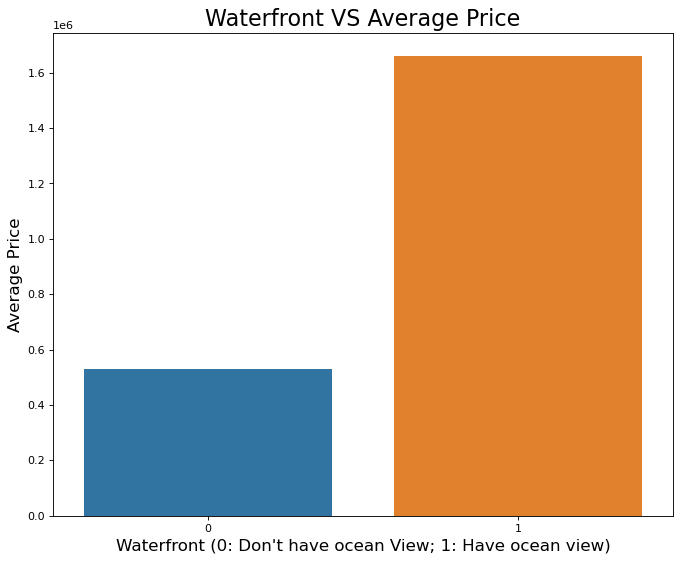

In [108]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'waterfront' , y = 'price', data = df_waterfront, estimator=sum)
plt.title('Waterfront VS Average Price', size =20)
plt.xlabel("Waterfront (0: Don't have ocean View; 1: Have ocean view)",size = 15)
plt.ylabel("Average Price", size = 15)
plt.show()

- Waterfront have positive impact to a House price in King County, Washington

#### View vs Average Price

In [109]:
df_view = df.pivot_table(index='view', values='price', aggfunc='mean').sort_values('price', ascending=False).reset_index()
df_view

,view,price
0,4,1.463711e+06
1,3,9.719653e+05
2,1,8.122808e+05
3,2,7.925151e+05
4,0,4.966805e+05


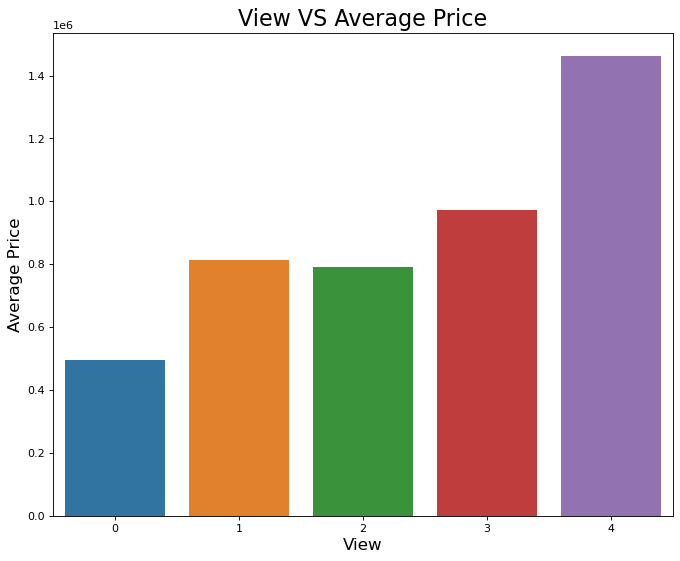

In [110]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'view' , y = 'price', data = df_view, estimator=sum)
plt.title('View VS Average Price', size =20)
plt.xlabel("View",size = 15)
plt.ylabel("Average Price", size = 15)
plt.show()

- View have positive impact to a House price in King County, Washington

#### House Conditon vs Average Price

In [111]:
df_housecondition = df.pivot_table(index='condition', values='price', aggfunc='median').sort_values('price', ascending=False).reset_index()
df_housecondition

,condition,price
0,5,526000.0
1,3,450250.0
2,4,440000.0
3,2,279000.0
4,1,270000.0


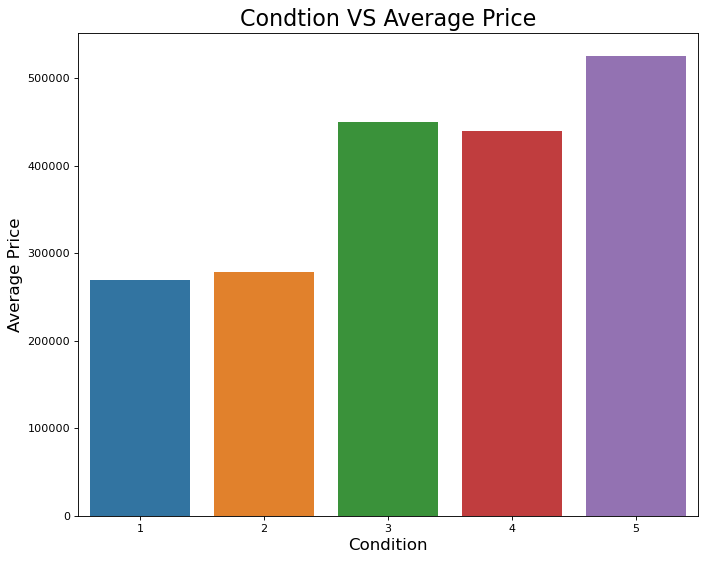

In [112]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'condition' , y = 'price', data = df_housecondition, estimator=sum)
plt.title('Condtion VS Average Price', size =20)
plt.xlabel("Condition",size = 15)
plt.ylabel("Average Price", size = 15)
plt.show()

- House Condition have positive impact to a House price in King County, Washington

#### House Quality (Grade Group) vs Average Price

In [113]:
df_housequality = df.pivot_table(index='house_quality', values='price', aggfunc='mean').sort_values('price', ascending=False).reset_index()
df_housequality

,house_quality,price
0,High,1.679400e+06
1,Average,5.166261e+05
2,Low,2.449217e+05


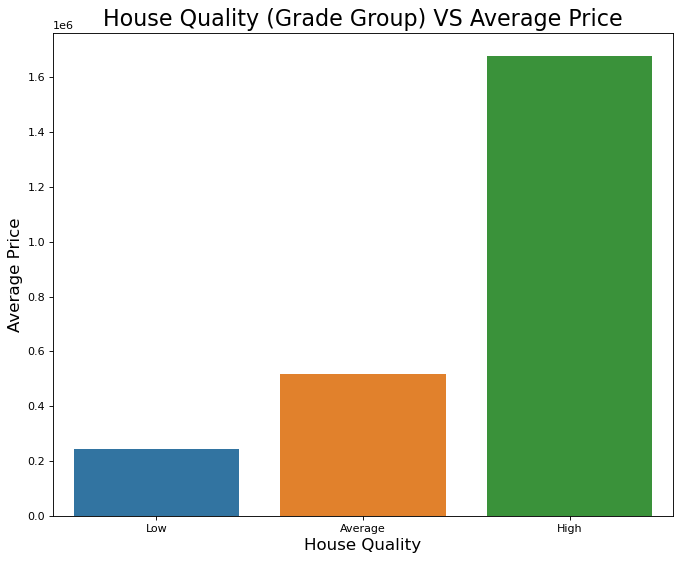

In [114]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'house_quality' , y = 'price', data = df_housequality, estimator=sum)
plt.title('House Quality (Grade Group) VS Average Price', size =20)
plt.xlabel("House Quality",size = 15)
plt.ylabel("Average Price", size = 15)
plt.show()

- House Grade have positive impact to a House price in King County, Washington

#### Basement vs Average Price

In [115]:
df_housebasement = df.pivot_table(index='basement_rec', values='price', aggfunc='mean').sort_values('price', ascending=False).reset_index()
df_housebasement

,basement_rec,price
0,Have Basement,622373.563803
1,Not Have Basement,487008.239664


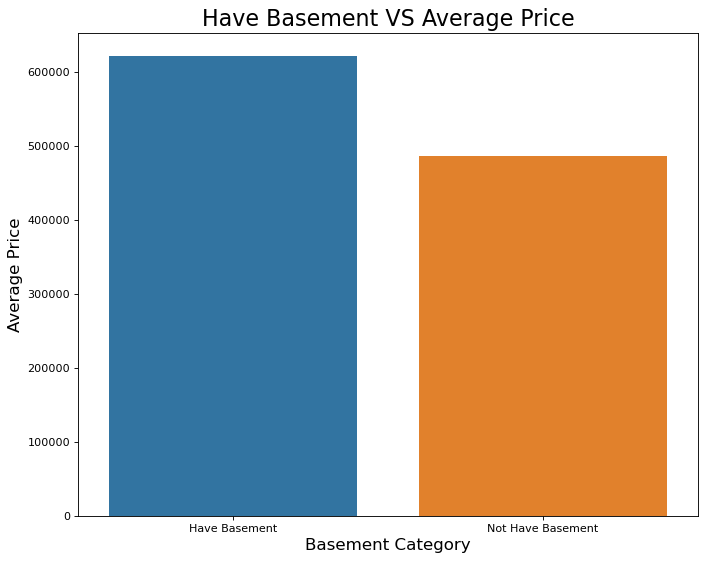

In [116]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'basement_rec' , y = 'price', data = df_housebasement, estimator=sum)
plt.title('Have Basement VS Average Price', size =20)
plt.xlabel("Basement Category",size = 15)
plt.ylabel("Average Price", size = 15)
plt.show()

In [117]:
df_housebasement2 = df.pivot_table(index='sqft_basement_group', values='price', aggfunc='mean').sort_values('price', ascending=False).reset_index()
df_housebasement2

,sqft_basement_group,price
0,1501 or more,1.330587e+06
1,1201 to 1500 sqft,8.431978e+05
2,901 to 1200 sqft,6.969434e+05
3,601 to 900 sqft,5.884573e+05
4,301 to 600 sqft,5.083340e+05
5,300 sqft or less,4.868555e+05


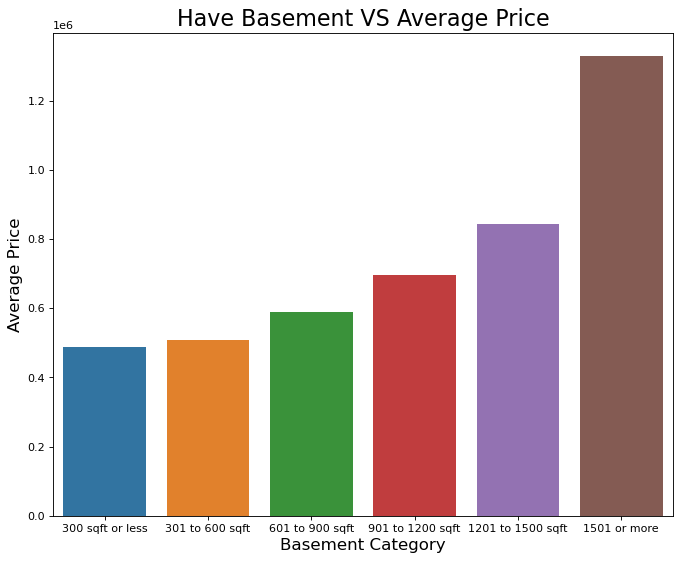

In [118]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'sqft_basement_group' , y = 'price', data = df_housebasement2, estimator=sum)
plt.title('Have Basement VS Average Price', size =20)
plt.xlabel("Basement Category",size = 15)
plt.ylabel("Average Price", size = 15)
plt.show()

- House with basement & sqft_basement have positive impact to a House price in King County, Washington

#### House Age Group vs Average Price

In [119]:
df_houseage = df.pivot_table(index='house_age_group', values='price', aggfunc='mean').sort_values('price', ascending=False).reset_index()
df_houseage

,house_age_group,price
0,<1,691805.467133
1,>100,636339.267650
2,11-25,603459.849622
3,6-10,599547.543238
4,76-100,589270.708453
5,1-5,569263.231472
6,26-50,489890.552887
7,51-75,465930.309660


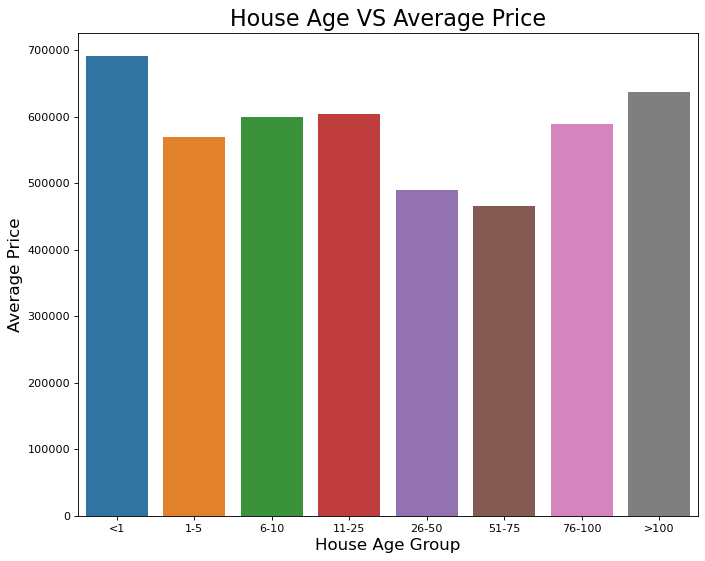

In [120]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'house_age_group' , y = 'price', data = df_houseage, estimator=sum)
plt.title('House Age VS Average Price', size =20)
plt.xlabel("House Age Group",size = 15)
plt.ylabel("Average Price", size = 15)
plt.show()

- House age don't have impact to a House price in King County, Washington

#### Renovated vs Average Price

In [121]:
df_houserenovated = df.pivot_table(index='renovated_rec', values='price', aggfunc='mean').sort_values('price', ascending=False).reset_index()
df_houserenovated

,renovated_rec,price
0,Renovated,760379.029540
1,Not Renovated,530473.143403


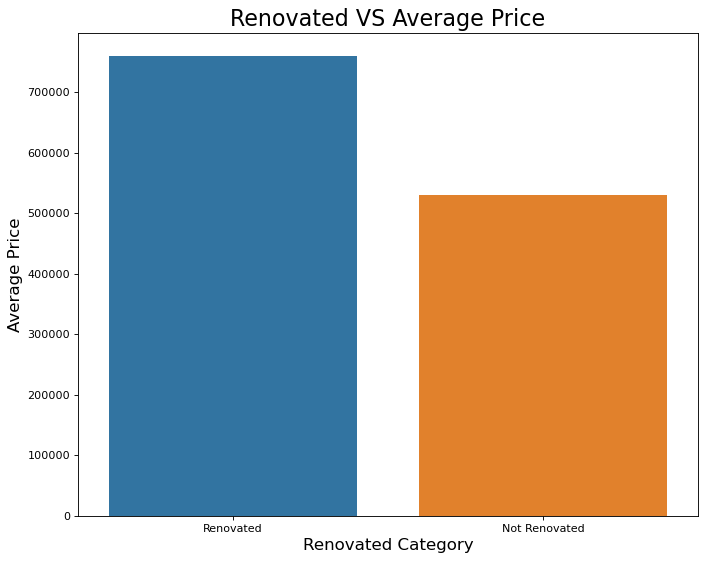

In [122]:
plt.figure(figsize=(10,8), dpi = 80)
sns.barplot(x= 'renovated_rec' , y = 'price', data = df_houserenovated, estimator=sum)
plt.title('Renovated VS Average Price', size =20)
plt.xlabel("Renovated Category",size = 15)
plt.ylabel("Average Price", size = 15)
plt.show()

- Renovated house have positive impact to a House price in King County, Washington

#### Zipcode VS Price

In [123]:
df_housezipcode = df.pivot_table(index='zipcode', values='price', aggfunc='mean').sort_values('price', ascending=False).reset_index()
df_housezipcode

,zipcode,price
0,98039,2.160607e+06
1,98004,1.355927e+06
2,98040,1.194230e+06
3,98112,1.095499e+06
4,98102,8.993954e+05
...,...,...
65,98148,2.849086e+05
66,98001,2.811949e+05
67,98032,2.512962e+05
68,98168,2.403284e+05


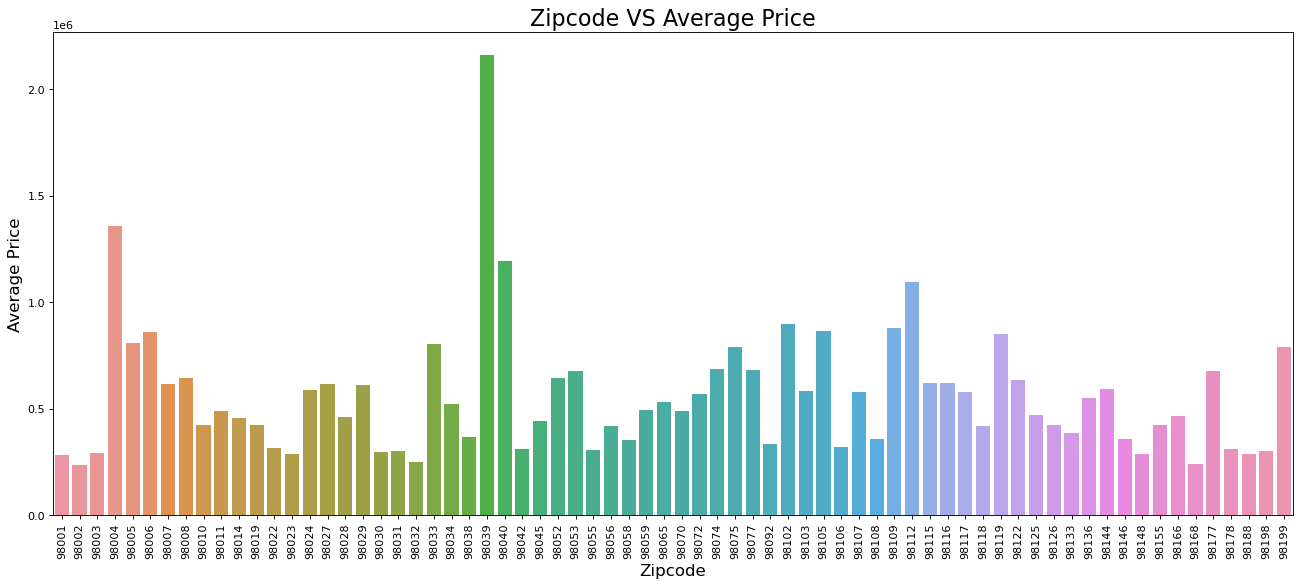

In [124]:
plt.figure(figsize=(20,8), dpi = 80)
sns.barplot(x= 'zipcode' , y = 'price', data = df_housezipcode, estimator=sum)
plt.title('Zipcode VS Average Price', size =20)
plt.xlabel("Zipcode",size = 15)
plt.ylabel("Average Price", size = 15)
plt.xticks(rotation = 90)
plt.show()

- Zipcode 98039, 98004, 98040 are 3 area with highest avarage price
- Zipcode 98032, 98168, 98002 are 3 area with lowest avarage price

#### Sqft_living_group vs sqft_living15

In [125]:
df_sqft1 = df.pivot_table(index='sqft_living_group', values='sqft_living15', aggfunc='mean').sort_values('sqft_living15', ascending=False).reset_index()
df_sqft1

,sqft_living_group,sqft_living15
0,"3,501 sqft or more",3192.497065
1,"3,001 to 3,500 sqft",2742.480931
2,"2,501 to 3,000 sqft",2396.179350
3,"2,001 to 2,500 sqft",2094.820324
4,"1,501 to 2,000 sqft",1768.784427
5,"1,001 to 1,500 sqft",1495.418460
6,"1,000 sqft or less",1315.526564


- sqft_living house in residental neighborhood is similar to each other

#### Sqft_ot_group vs sqft_lot15

In [126]:
df_sqft2 = df.pivot_table(index='sqft_lot_group', values='sqft_lot15', aggfunc='mean').sort_values('sqft_lot15', ascending=False).reset_index()
df_sqft2

,sqft_lot_group,sqft_lot15
0,"13,001 or more",39626.751346
1,"10,501 to 13,000 sqft",11145.169419
2,"8,001 to 10,500 sqft",9001.174780
3,"5,501 to 8,000 sqft",7079.917743
4,"3,001 to 5,500 sqft",4725.753434
5,"3,000 sqft or less",2403.867834


- sqft_lot house in residental neighborhood is similar to each other

#### Sqft_living_group vs sqft_above

In [127]:
df_sqft3 = df.pivot_table(index='sqft_living_group', values='sqft_above', aggfunc='mean').sort_values('sqft_above', ascending=False).reset_index()
df_sqft3

,sqft_living_group,sqft_above
0,"3,501 sqft or more",3557.767123
1,"3,001 to 3,500 sqft",2791.964447
2,"2,501 to 3,000 sqft",2303.079159
3,"2,001 to 2,500 sqft",1853.677535
4,"1,501 to 2,000 sqft",1495.981230
5,"1,001 to 1,500 sqft",1189.376656
6,"1,000 sqft or less",838.232683


- sqft_living have positive impact to sqft_above

#### sqft_living group vs bedrooms

In [128]:
df_sqft4 = df.pivot_table(index='sqft_living_group', values='bedrooms', aggfunc='mean').sort_values('bedrooms', ascending=False).reset_index()
df_sqft4

,sqft_living_group,bedrooms
0,"3,501 sqft or more",4.321592
1,"3,001 to 3,500 sqft",4.043956
2,"2,501 to 3,000 sqft",3.916252
3,"2,001 to 2,500 sqft",3.638743
4,"1,501 to 2,000 sqft",3.262219
5,"1,001 to 1,500 sqft",2.827815
6,"1,000 sqft or less",2.166106


- sqft_living have positive impact to number of bedrooms in a house

#### sqft_living group vs bathrooms

In [129]:
df_sqft5 = df.pivot_table(index='sqft_living_group', values='bathrooms', aggfunc='mean').sort_values('bathrooms', ascending=False).reset_index()
df_sqft5

,sqft_living_group,bathrooms
0,"3,501 sqft or more",3.380137
1,"3,001 to 3,500 sqft",2.772463
2,"2,501 to 3,000 sqft",2.545220
3,"2,001 to 2,500 sqft",2.309079
4,"1,501 to 2,000 sqft",2.008688
5,"1,001 to 1,500 sqft",1.547651
6,"1,000 sqft or less",1.062038


- sqft_living have positive impact to number of bathrooms in a house

#### Mapping By Pricing Group

In [130]:
Washington_map = folium.Map(location = [47.5, -122.2], zoom_start = 10)

In [131]:
df_price_1 =df[df['pricing_group'] == 'Less Than 100K'].head(1000)
df_price_2 =df[df['pricing_group'] == '100K - 149.9K'].head(1000)
df_price_3 =df[df['pricing_group'] == '150K - 349.9K'].head(1000)
df_price_4 =df[df['pricing_group'] == '350K - 499.9K'].head(1000)
df_price_5 =df[df['pricing_group'] == '500K - 649.9K'].head(1000)
df_price_6 =df[df['pricing_group'] == '650K - 799.9K'].head(1000)
df_price_7 =df[df['pricing_group'] == '800K - 999.9K'].head(1000)
df_price_8 =df[df['pricing_group'] == '1M - 2M'].head(1000)
df_price_9 =df[df['pricing_group'] == 'More Than 2M'].head(1000)

In [132]:
for lat, long, in zip(df_price_1['lat'], df_price_1['long']):
    folium.CircleMarker([lat, long],
                        color='red',
                        radius = 0.05,
                        fill=True,
                        fill_opacity=1,
                        popup='Less Than 100K').add_to(Washington_map)
    
for lat, long, in zip(df_price_2['lat'], df_price_2['long']):
    folium.CircleMarker([lat, long],
                        color='orange',
                        radius = 0.05,
                        fill=True,
                        fill_opacity=1,
                        popup='100K - 149.9K').add_to(Washington_map)
    
for lat, long, in zip(df_price_3['lat'], df_price_3['long']):
    folium.CircleMarker([lat, long],
                        color='yellow',
                        radius = 0.05,
                        fill=True,
                        fill_opacity=1,
                        popup='150K - 349.9K').add_to(Washington_map)
    
for lat, long, in zip(df_price_4['lat'], df_price_4['long']):
    folium.CircleMarker([lat, long],
                        color='green',
                        radius = 0.05,
                        fill=True,
                        fill_opacity=1,
                        popup='350K - 499.9K').add_to(Washington_map)

for lat, long, in zip(df_price_5['lat'], df_price_5['long']):
    folium.CircleMarker([lat, long],
                        color='blue',
                        radius = 0.05,
                        fill=True,
                        fill_opacity=1,
                        popup='500K - 649.9K').add_to(Washington_map)

for lat, long, in zip(df_price_6['lat'], df_price_6['long']):
    folium.CircleMarker([lat, long],
                        color='pink',
                        radius = 0.05,
                        fill=True,
                        fill_opacity=1,
                        popup='650K - 799.9K').add_to(Washington_map)

for lat, long, in zip(df_price_7['lat'], df_price_7['long']):
    folium.CircleMarker([lat, long],
                        color='purple',
                        radius = 0.05,
                        fill=True,
                        fill_opacity=1,
                        popup='800K - 999.9K').add_to(Washington_map)

for lat, long, in zip(df_price_8['lat'], df_price_8['long']):
    folium.CircleMarker([lat, long],
                        color='gray',
                        radius = 0.05,
                        fill=True,
                        fill_opacity=1,
                        popup='1M - 2M').add_to(Washington_map)

for lat, long, in zip(df_price_9['lat'], df_price_9['long']):
    folium.CircleMarker([lat, long],
                        color='black',
                        radius = 0.05,
                        fill=True,
                        fill_opacity=1,
                        popup='More than 2M').add_to(Washington_map)
# Washington_map

# DATA INSIGHT

- Majority Houses in King County, Washington mostly are sold in range 150,000 - 349,000
- Majority Houses in King County, Washington have 3 Bedrooms
- Is it possible in one house have 33 Bedrooms? ==> The data is kinda weird since the house only has 1620 sqft living (150m2)
- Majority Houses in King County, Washington have 2.5 Bathrooms
- Zero bedrooms & zero bathrooms data are removed because it's rarely possible to a house have zero bedrooms and bathrooms
- Majority Houses in King County, Washington have 1501 - 2000 sqft of Living Area
- Majority Houses in King County, Washington have 5501 - 8000 sqft of Lot Area
- Majority Houses in King County, Washington have 1 floors
- Majority Houses in King County, Washington don't have waterfront
- Majority Houses in King County, Washington don't have a good view
- Majority Houses in King County, Washington are in average quality
- Majority Houses in King County, Washington don't have basement 
- If houses have basement, mostly in 300sqft or less area
- Majority Houses in King County, Washington are 26-50 years old
- Majority Houses in King County, Washington have never been renovated
- Majority Houses in King County, Washington are in 98103 zipcode area
- Number of bedrooms have positive impact to a House price in King County, Washington
- Number of bathrooms have positive impact to a House price in King County, Washington
- Sqft_living have positive impact to a House price in King County, Washington
- Sqft_lot don't have impact to a House price in King County, Washington
- Number of floors don't have impact to a House price in King County, Washington
- Waterfront have positive impact to a House price in King County, Washington
- View have positive impact to a House price in King County, Washington
- House Condition have positive impact to a House price in King County, Washington
- House Grade have positive impact to a House price in King County, Washington
- House with basement & sqft_basement have positive impact to a House price in King County, Washington
- House age don't have impact to a House price in King County, Washington
- Renovated house have positive impact to a House price in King County, Washington
- Zipcode 98039, 98004, 98040 are 3 area with highest avarage price
- Zipcode 98032, 98168, 98002 are 3 area with lowest avarage price
- sqft_living house in residental neighborhood is similar to each other
- sqft_lot house in residental neighborhood is similar to each other
- sqft_living have positive impact to sqft_above
- sqft_living have positive impact to number of bedrooms in a house
- sqft_living have positive impact to number of bathrooms in a house
- Price increases as we move from South to North along the latitude and show little variation along the longitude

# SUMMARY & RECOMMENDATION

For Machine Learning
- Remove data with bedrooms & bathrooms 0
- Remove data with 33 bedrooms
- No need to incluce sqft_lot, number of floors, age, column as features
- Only include one of sqft_living, sqft_above or sqft_living15
- Only include one of sqft_lot or sqft_lot15